In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
from pylab import rcParams
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# <font color='green'>Sparkling Wine</font>

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [3]:
rcParams['figure.figsize'] = 12,7

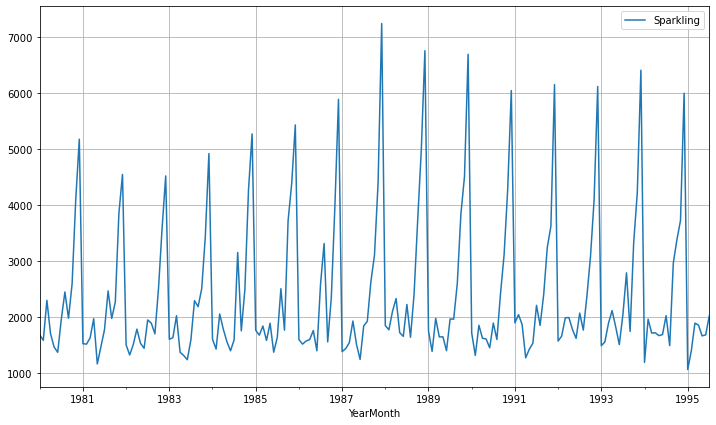

In [4]:
df.plot(grid=True);

In [5]:
df.isna().sum()

Sparkling    0
dtype: int64

In [6]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Yearly Boxplot

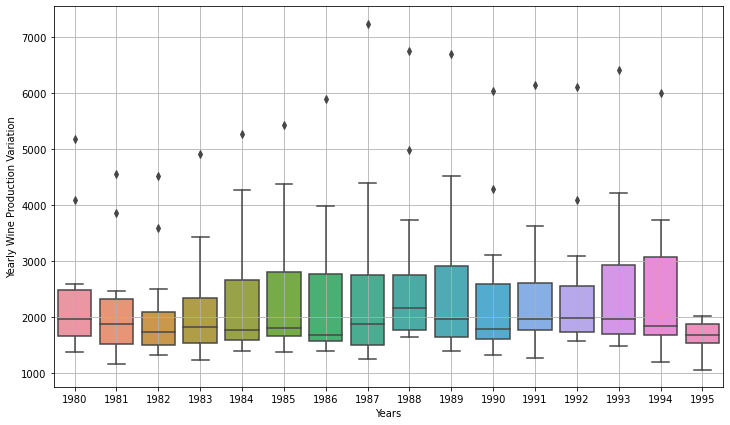

In [7]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x=df.index.year,y=df.values[:,0], ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

### Monthly Boxplot

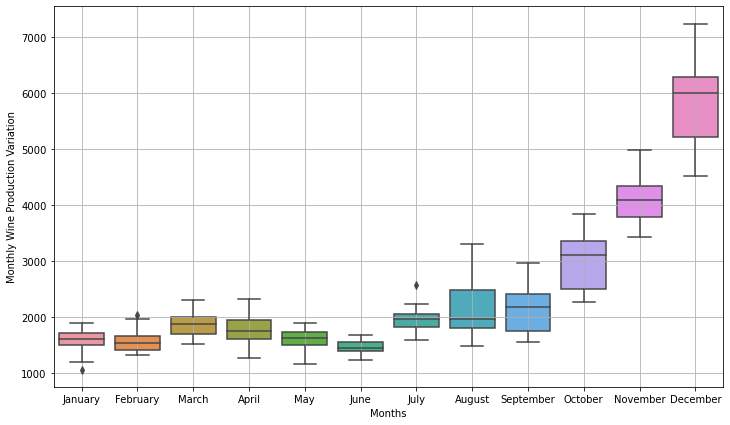

In [8]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x=df.index.month_name(),y=df['Sparkling'], ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Production Variation');

### Plot a time series monthplot to understand the spread of wine sales across different years and within different months across years.

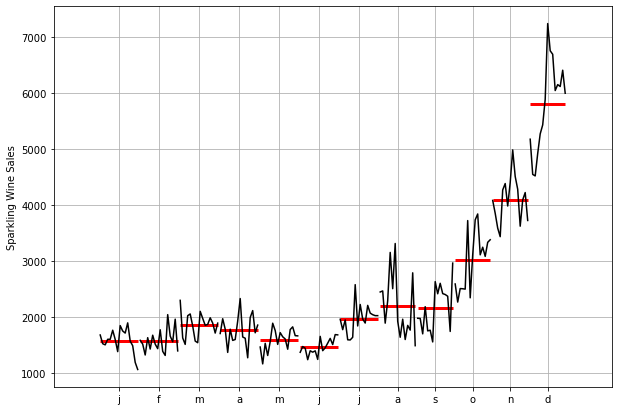

In [9]:
from statsmodels.graphics.tsaplots import month_plot
rcParams['figure.figsize'] = 10,7
month_plot(df['Sparkling'],ylabel='Sparkling Wine Sales')
plt.grid();

In [10]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

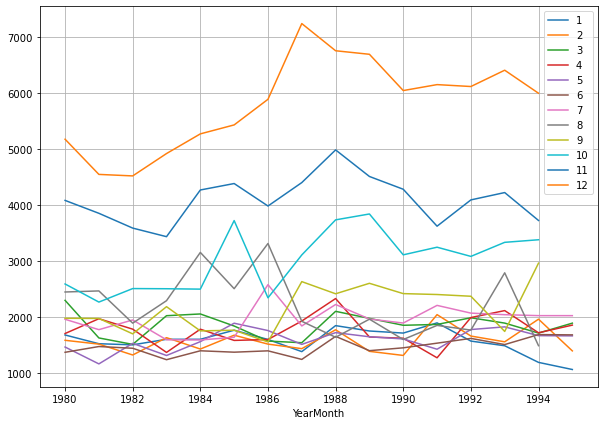

In [11]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

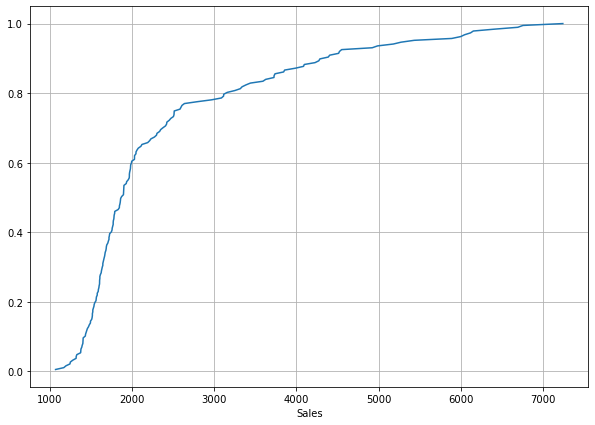

In [12]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 7))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [13]:
# year-end
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

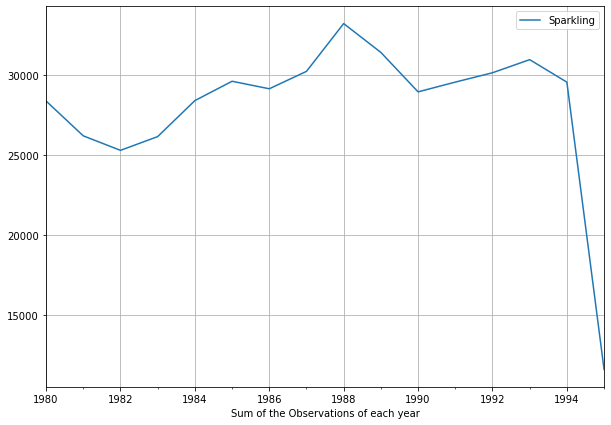

In [14]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [15]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
YearMonth              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

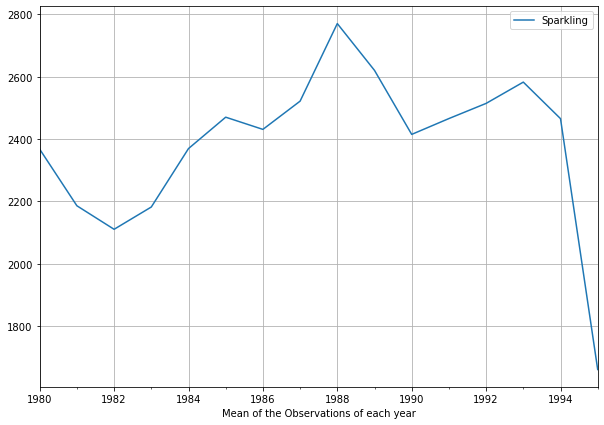

In [16]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [17]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

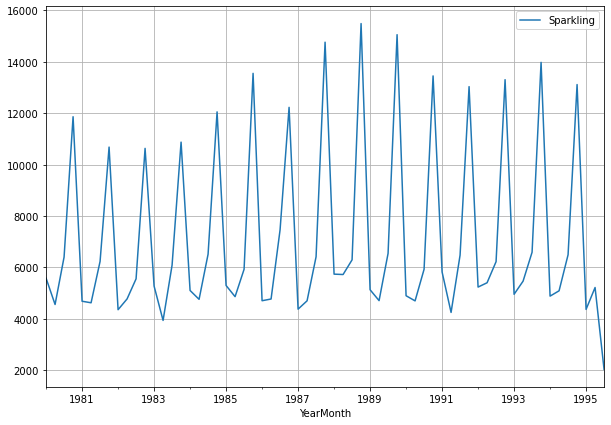

In [18]:
df_quarterly_sum.plot();
plt.grid()

In [19]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
YearMonth              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

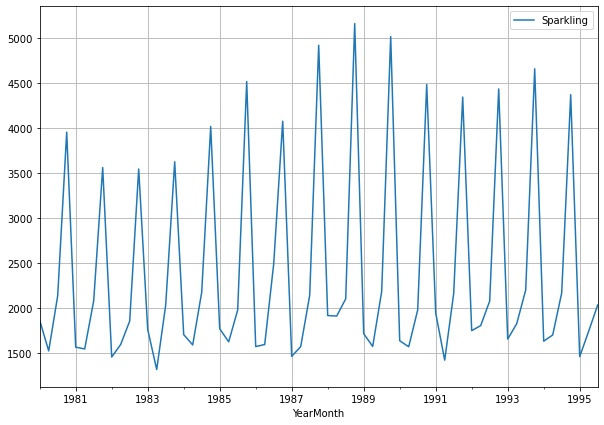

In [20]:
df_quarterly_mean.plot();
plt.grid()

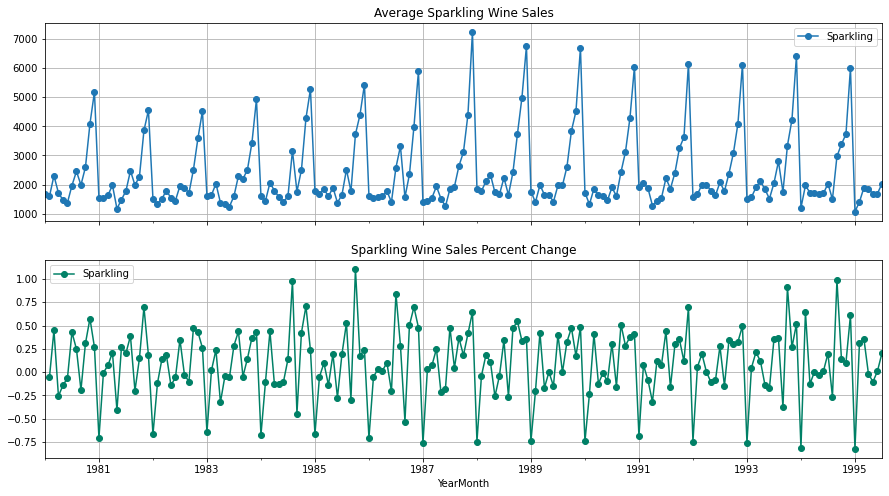

In [21]:
# group by date and get average WineSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

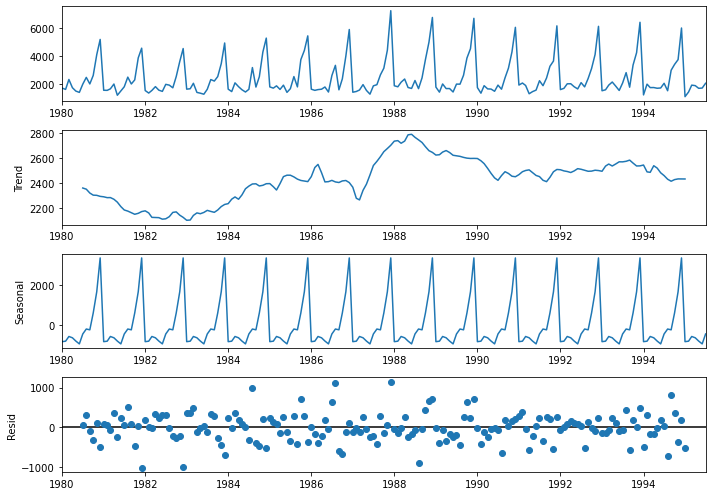

In [22]:
rcParams['figure.figsize'] = 10,7
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [24]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [25]:
deaseasonalized_ts = trend + residual
# deaseasonalized_ts.head(12)

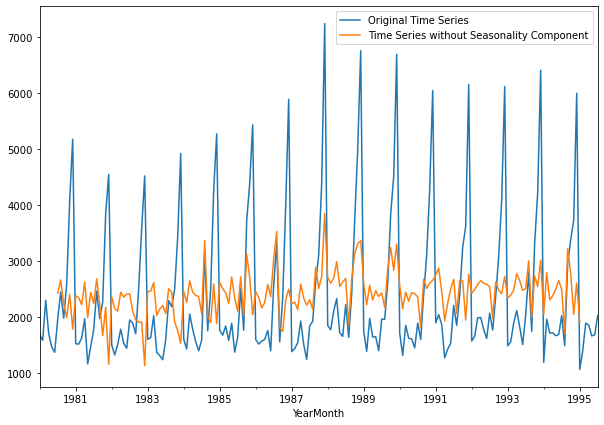

In [26]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [27]:
# decomposition = seasonal_decompose(df,model='multiplicative')
# decomposition.plot();

# 3. Split the data into training and test. The test data should start in 1991.

In [28]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']

In [29]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


Text(0.5, 1.0, 'Sparkling Sales')

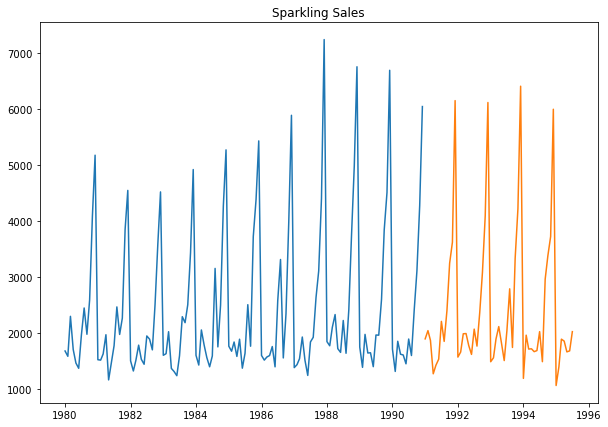

In [31]:
plt.plot(train['Sparkling'])
plt.plot(test['Sparkling'])
plt.title('Sparkling Sales')

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

<font color='blue'>Method 1: Linear Regression</font>

In [32]:
len(train)

132

In [33]:
len(test)

55

In [34]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [35]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [36]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [37]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

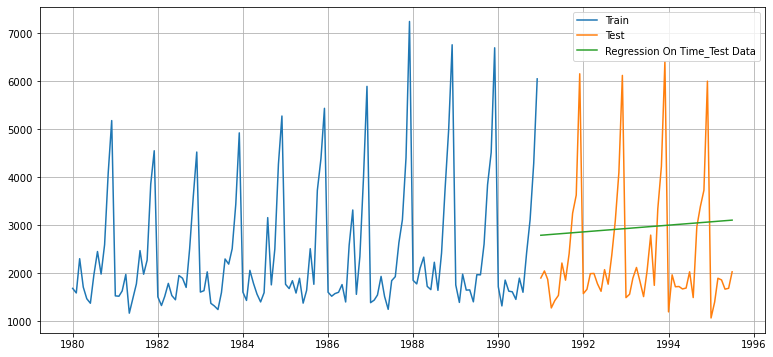

In [38]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(13,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [39]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [40]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

<font color='blue'>Naive Approach</font>

In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

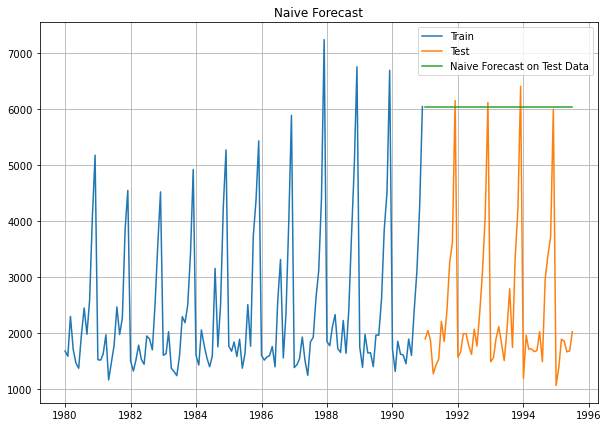

In [43]:
plt.figure(figsize=(10,7))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [44]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [45]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

<font color='blue'>Simple Average</font>

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

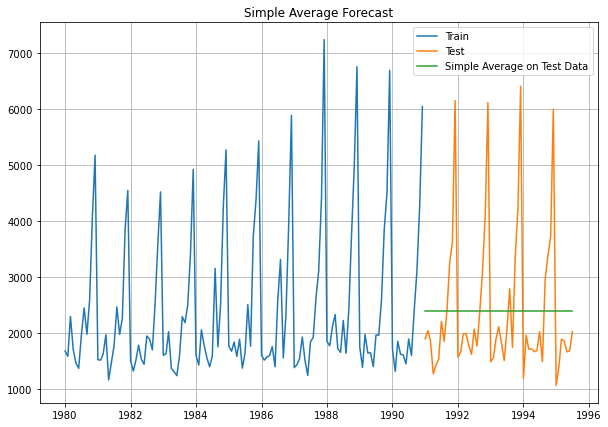

In [48]:
plt.figure(figsize=(10,7))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [49]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

<font color='blue'>Moving Average(MA)</font>

In [51]:
# entire data
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
# MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
# MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4
YearMonth                                    
1980-01-01       1686         NaN         NaN
1980-02-01       1591      1638.5         NaN
1980-03-01       2304      1947.5         NaN
1980-04-01       1712      2008.0     1823.25
1980-05-01       1471      1591.5     1769.50

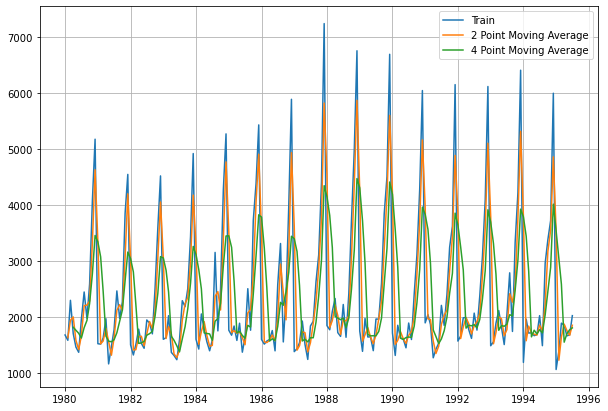

In [53]:
## Plotting on the whole data

plt.figure(figsize=(10,7))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
# plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
# plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

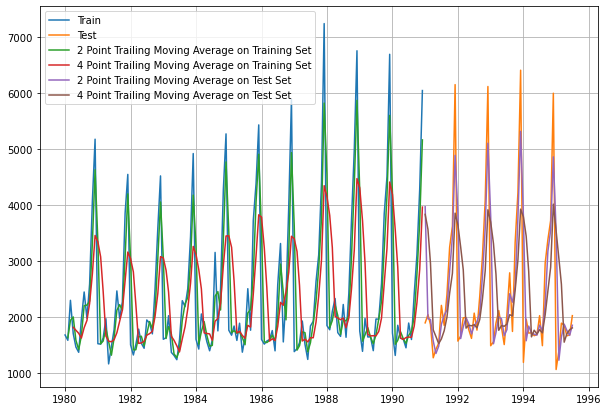

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,7))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
# plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
# plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
# plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
# plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [56]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

# rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
# print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

# rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
# print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590


In [57]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4]}
#                                           ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'])
#                                    ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694

## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

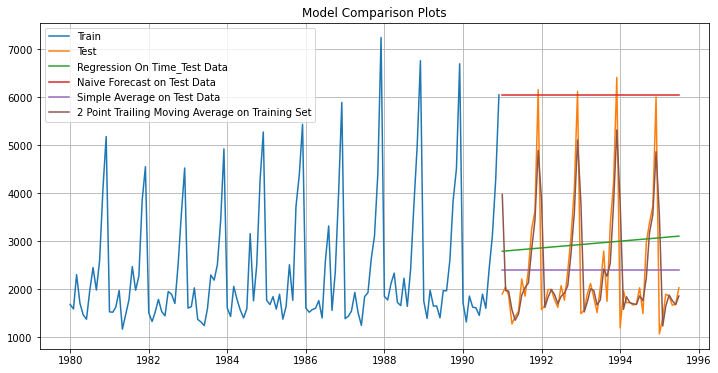

In [58]:
## Plotting on both Training and Test data

plt.figure(figsize=(12,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

<font color='blue'>Simple Exponential Smoothing </font>

In [59]:
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'],initialization_method='estimated')

In [61]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [62]:
model_SES_autofit.params

{'smoothing_level': 0.0702844204361008,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2107.1671767203875,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test['Sparkling']))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2804.673099
1991-02-01       2049  2804.673099
1991-03-01       1874  2804.673099
1991-04-01       1279  2804.673099
1991-05-01       1432  2804.673099

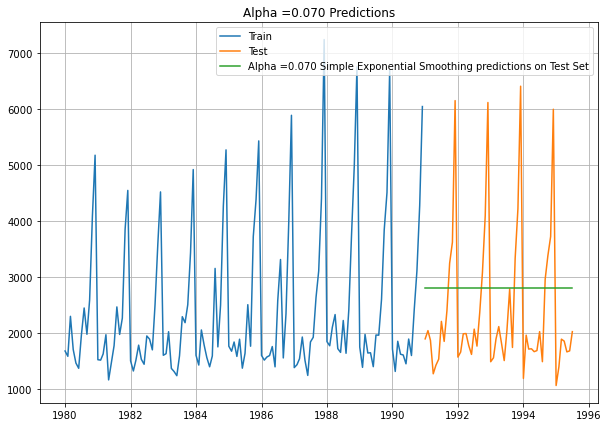

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,7))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.070 Predictions');

In [65]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.070 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.070 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1338.008


In [66]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.070,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
Alpha=0.070,SimpleExponentialSmoothing  1338.007771

In [67]:
# Setting different alpha values.
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [68]:
# SES_test

In [69]:
# for i in np.arange(0.3,1,0.1):
alpha=[0.001,0.01,0.05,0.1,0.2,0.3]
for i in alpha:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(SES_test['Sparkling']))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [70]:
# resultsDf_6=pd.DataFrame()
# resultsDf_6=resultsDf_6.append(resultsDf_6)

In [71]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
1         0.010  1397.988872  1286.648058
2         0.050  1324.401979  1316.359347
3         0.100  1336.428478  1375.393335
0         0.001  1549.799408  1497.004890
4         0.200  1356.950475  1595.206839
5         0.300  1359.953398  1935.507132

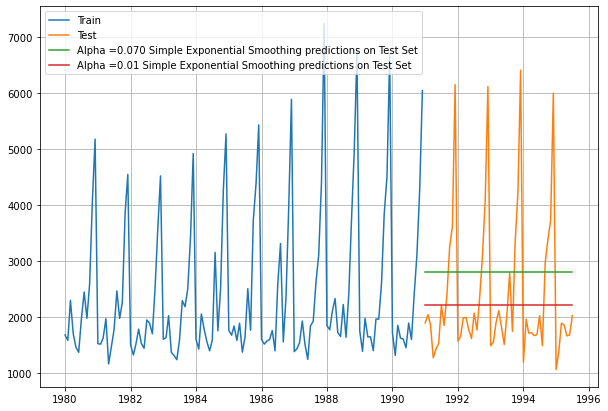

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,7))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.01], label='Alpha =0.01 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [73]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.01,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
Alpha=0.070,SimpleExponentialSmoothing  1338.007771
Alpha=0.01,SimpleExponentialSmoothing   1286.648058

<font color='blue'>Holt's Model (Double Exponential Smoothing) </font>

In [74]:
DES_train = train.copy()
DES_test = test.copy()

In [75]:
model_DES = Holt(DES_train['Sparkling'])

In [76]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [77]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(DES_test['Sparkling']))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [78]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

In [79]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

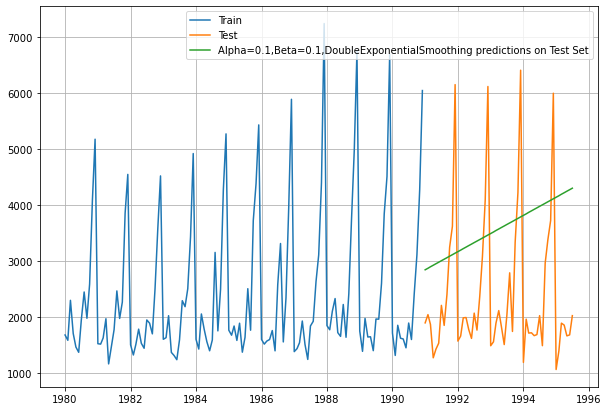

In [80]:
plt.figure(figsize=(10,7))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [81]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
Alpha=0.070,SimpleExponentialSmoothing         1338.007771
Alpha=0.01,SimpleExponentialSmoothing          1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

<font color='blue'>Holt-Winter's Model (Triple Exponential Smoothing)</font>

In [82]:
TES_train = train.copy()
TES_test = test.copy()

In [83]:
# TES_train

In [84]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

In [85]:
model_TES_autofit = model_TES.fit()

In [86]:
model_TES_autofit.params

{'smoothing_level': 0.11107217417240671,
 'smoothing_trend': 0.06170680469762709,
 'smoothing_seasonal': 0.3950791076065561,
 'damping_trend': nan,
 'initial_level': 1640.0000512525944,
 'initial_trend': -15.109511572670874,
 'initial_seasons': array([1.03456669, 0.99021652, 1.40531664, 1.20126559, 0.9391404 ,
        0.9515692 , 1.29531027, 1.68051909, 1.35779891, 1.79440879,
        2.82810882, 3.60193154]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test['Sparkling']))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1577.247584
1991-02-01       2049   1333.627590
1991-03-01       1874   1746.043504
1991-04-01       1279   1630.571774
1991-05-01       1432   1523.311906

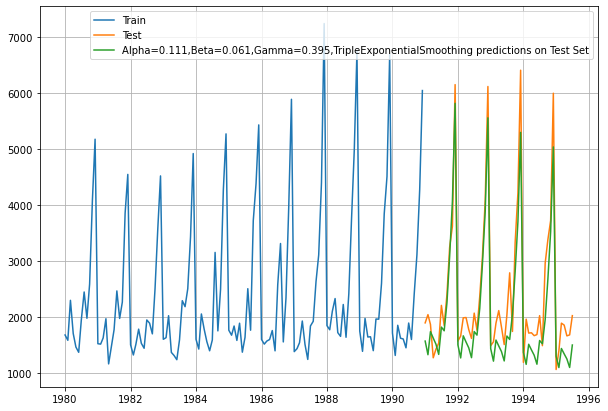

In [88]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(10,7))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [89]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.592


In [90]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516

In [91]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [92]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test['Sparkling']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [93]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.1          0.1           0.1     388.351959  5.799963e+02
1             0.1          0.1           0.2     372.002250  6.174690e+02
2             0.1          0.1           0.3     364.222099  6.387802e+02
3             0.1          0.1           0.4     362.590749  6.447620e+02
4             0.1          0.1           0.5     365.655545  6.411226e+02
..            ...          ...           ...            ...           ...
995           1.0          1.0           0.6  153394.791827  7.989790e+05
996           1.0          1.0           0.7   94040.964957  1.074413e+06
997           1.0          1.0           0.8  102196.953755  5.010607e+06
998           1.0          1.0           0.9   77924.294413  4.318265e+05
999           1.0          1.0           1.0  239917.432848  1.254280e+05

[1000 rows x 5 columns]

In [94]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  389.772245  336.715250
211           0.3          0.2           0.2  395.529174  350.145204
110           0.2          0.2           0.1  405.333164  352.571689
200           0.3          0.1           0.1  394.630053  352.607849
20            0.1          0.3           0.1  414.423963  354.534561

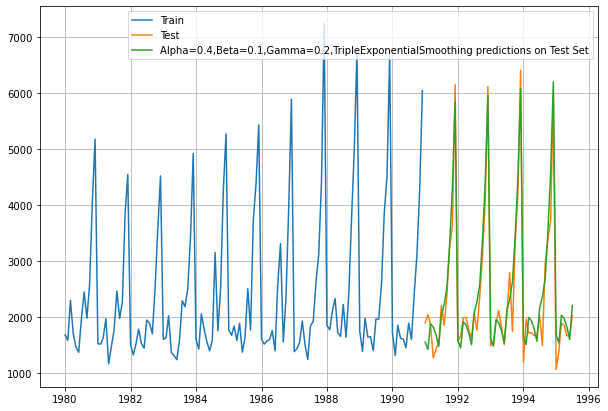

In [95]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(10,7))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250

# Best Model so far

In [97]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [98]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

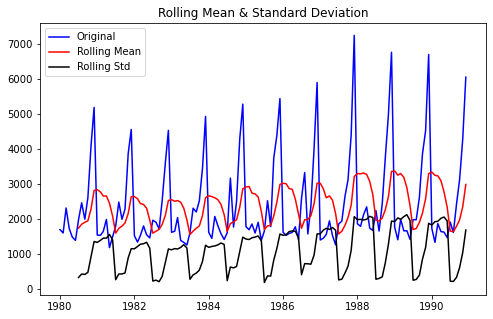

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [99]:
plt.figure(figsize=(8,5))
test_stationarity(train['Sparkling'])

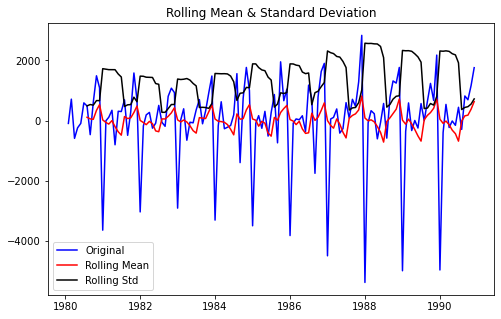

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [100]:
plt.figure(figsize=(8,5))
test_stationarity(train['Sparkling'].diff().dropna())

In [101]:
# dftest = adfuller(df,regression='ct')
# print('DF test statistic is %3.3f' %dftest[0])
# print('DF test p-value is' ,dftest[1])
# print('Number of lags used' ,dftest[2])
# print(dftest)

In [102]:
# dftest = adfuller(df.diff().dropna(),regression='ct')
# print('DF test statistic is %3.3f' %dftest[0])
# print('DF test p-value is' ,dftest[1])
# print('Number of lags used' ,dftest[2])

In [103]:
# df.diff().dropna().plot(grid=True);

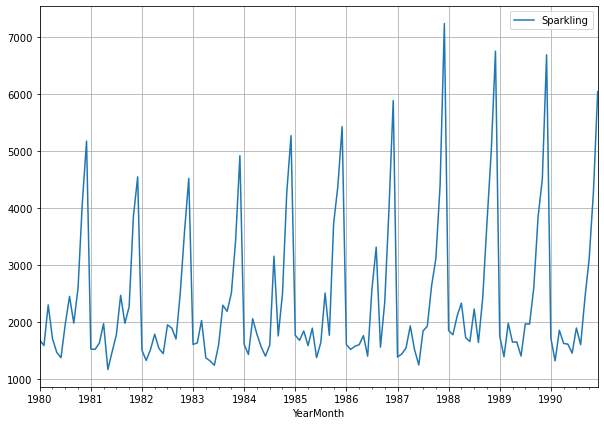

In [104]:
train.plot(grid=True);

In [105]:
# dftest = adfuller(train,regression='ct')
# print('DF test statistic is %3.3f' %dftest[0])
# print('DF test p-value is' ,dftest[1])
# print('Number of lags used' ,dftest[2])

In [106]:
# dftest = adfuller(train.diff().dropna(),regression='ct')
# print('DF test statistic is %3.3f' %dftest[0])
# print('DF test p-value is' ,dftest[1])
# print('Number of lags used' ,dftest[2])

<Figure size 576x360 with 0 Axes>

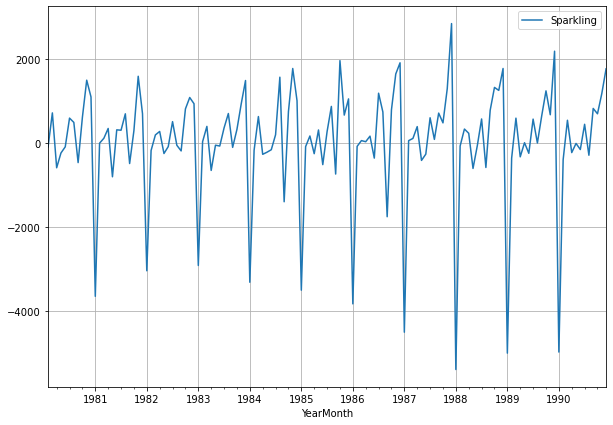

In [107]:
plt.figure(figsize=(8,5))
train.diff().dropna().plot(grid=True);

In [108]:
train.diff().head()

Sparkling
YearMonth            
1980-01-01        NaN
1980-02-01      -95.0
1980-03-01      713.0
1980-04-01     -592.0
1980-05-01     -241.0

In [109]:
train.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [110]:
train['Sparkling'].diff().values

array([       nan, -9.500e+01,  7.130e+02, -5.920e+02, -2.410e+02,
       -9.400e+01,  5.890e+02,  4.870e+02, -4.690e+02,  6.120e+02,
        1.491e+03,  1.092e+03, -3.649e+03, -7.000e+00,  1.100e+02,
        3.430e+02, -8.060e+02,  3.100e+02,  3.010e+02,  6.910e+02,
       -4.910e+02,  2.920e+02,  1.584e+03,  6.940e+02, -3.041e+03,
       -1.810e+02,  1.890e+02,  2.720e+02, -2.530e+02, -8.800e+01,
        5.050e+02, -5.700e+01, -1.910e+02,  8.080e+02,  1.079e+03,
        9.310e+02, -2.915e+03,  2.900e+01,  3.920e+02, -6.550e+02,
       -5.500e+01, -7.500e+01,  3.550e+02,  6.980e+02, -1.070e+02,
        3.200e+02,  9.290e+02,  1.483e+03, -3.314e+03, -1.740e+02,
        6.260e+02, -2.720e+02, -2.220e+02, -1.630e+02,  1.930e+02,
        1.562e+03, -1.400e+03,  7.450e+02,  1.769e+03,  1.001e+03,
       -3.503e+03, -8.900e+01,  1.640e+02, -2.570e+02,  3.070e+02,
       -5.170e+02,  2.660e+02,  8.670e+02, -7.410e+02,  1.956e+03,
        6.610e+02,  1.046e+03, -3.828e+03, -8.300e+01,  5.400e

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

<font color='blue'>AUTO ARIMA</font>

In [111]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [112]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [113]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918473
ARIMA(0, 1, 2) - AIC:2234.4083231266072
ARIMA(0, 1, 3) - AIC:2233.9948577440127
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946777883
ARIMA(1, 1, 2) - AIC:2234.5272004523094
ARIMA(1, 1, 3) - AIC:2235.607812019134
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263149635
ARIMA(2, 1, 2) - AIC:2213.5092124849007
ARIMA(2, 1, 3) - AIC:2232.9704368339308
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498597385455
ARIMA(3, 1, 2) - AIC:2230.9082334735585
ARIMA(3, 1, 3) - AIC:2221.4647204024486


In [114]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head(3)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.464720
14  (3, 1, 2)  2230.908233

In [115]:
auto_ARIMA = ARIMA(train['Sparkling'].values, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 13 Feb 2022   AIC                           2213.509
Time:                        09:13:42   BIC                           2227.885
Sample:                             0   HQIC                          2219.351
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

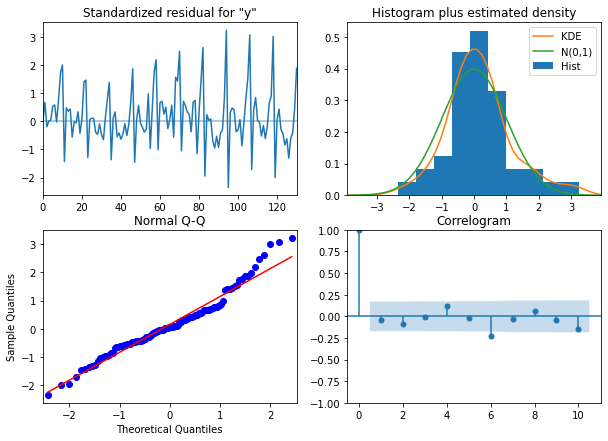

In [116]:
results_auto_ARIMA.plot_diagnostics();

In [117]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test['Sparkling']))

In [118]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [119]:
# predicted_auto_ARIMA

In [120]:
rmse_model_9_1 = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape_model_9_1 = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse_model_9_1,'\nMAPE:',mape_model_9_1)

RMSE: 1299.9797790918212 
MAPE: 47.09992469064837


In [121]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_model_9_1}
                           ,index=['AUTO ARIMA(2,1,2)'])

resultsDf_9_1

Test RMSE
AUTO ARIMA(2,1,2)  1299.979779

In [122]:
resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
AUTO ARIMA(2,1,2)                                   1299.979779

<font color='blue'>AUTO SARIMA</font>

In [123]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [124]:
seasonal = decomposition.seasonal
check_stationarity(seasonality)

The series is stationary


In [125]:
import itertools
p = q = range(0, 4)
d= range(1,2)
# we're not doing any seasonlity difference, hence it is 0. Since we're doing another PDQ...
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [126]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [127]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684376
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236719
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3875.9371140019684
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389572
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791699
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3726.4199366637235
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470853
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860856
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920772
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4187.342683151317
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625802
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065428
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3960.9535571110255
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566464
SARIMA(0, 1, 

SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279670088
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3731.3884740418034
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235061143313
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595850717333
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342864950293
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2369.6354804179164
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673331274312
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221280626432
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.5824603459007
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3105.1182646273323
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114597034
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372629235624
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432350874
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3591.0708058818477
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140936786404
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005776100892
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404024267788
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3386.170548977424
SARIMA(2, 1, 

In [128]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
236  (3, 1, 2)  (3, 0, 0, 12)  1387.234718
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788332
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602196
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
252  (3, 1, 3)  (3, 0, 0, 12)  1389.142084

In [129]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [], 12)   Log Likelihood                -684.617
Date:                             Sun, 13 Feb 2022   AIC                           1387.235
Time:                                     09:27:26   BIC                           1409.931
Sample:                                          0   HQIC                          1396.395
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5374      0.338     -1.588      0.112      -1.201       0.126
ar.L2          0.0256      

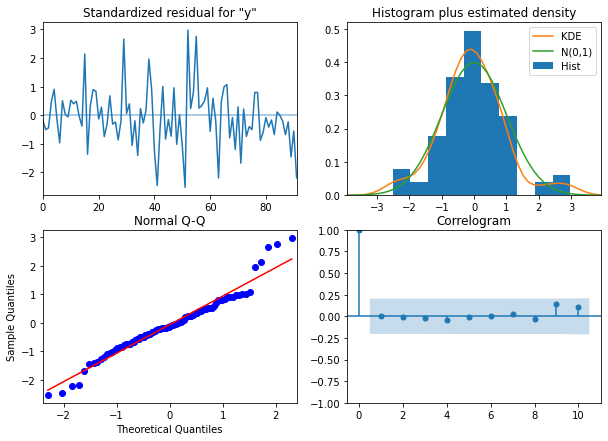

In [130]:
results_auto_SARIMA.plot_diagnostics();

In [131]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test['Sparkling']))

In [132]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1344.503071  410.093958     540.733683    2148.272458
1  1308.192927  425.316202     474.588489    2141.797364
2  1648.404047  425.317496     814.797073    2482.011020
3  1634.486686  433.859062     784.138551    2484.834822
4  1433.801712  434.084774     583.011189    2284.592236

In [133]:
rmse_model_9_2 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape_model_9_2 = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse_model_9_2,'\nMAPE:',mape_model_9_2)

RMSE: 543.1707218835742 
MAPE: 23.239518516689607


In [134]:
resultsDf_9_2 = pd.DataFrame({'Test RMSE': rmse_model_9_2}
                           ,index=['AUTO SARIMA(3, 1, 2)(3, 0, 0, 12)'])

resultsDf_9_2

Test RMSE
AUTO SARIMA(3, 1, 2)(3, 0, 0, 12)  543.170722

In [135]:
resultsDf = pd.concat([resultsDf, resultsDf_9_2])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
AUTO ARIMA(2,1,2)                                   1299.979779
AUTO SARIMA(3, 1, 2)(3, 0, 0, 12)                    543.170722

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

<font color='red'>Manual ARIMA</font>

<Figure size 576x360 with 0 Axes>

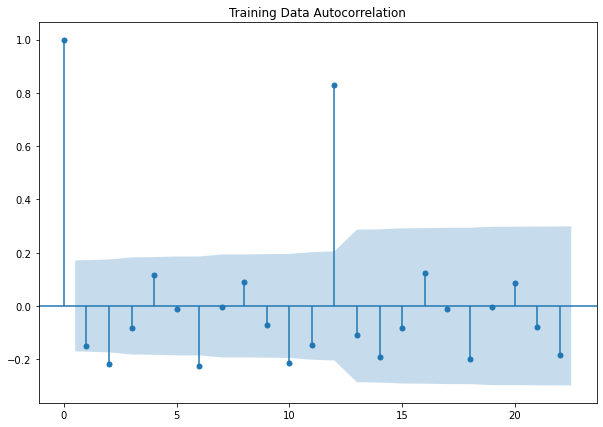

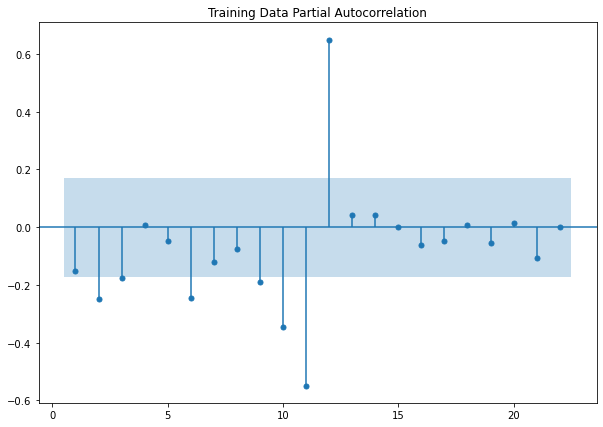

In [136]:
plt.figure(figsize=(8,5))
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

p=0(AR)
To estimate the amount of AR terms, you need to look at the PACF plot. First, ignore the value at lag 0. It will always show a perfect correlation, since we are estimating the correlation between today’s value with itself. Note that there is a blue area in the plot, representing the confidence interval. To estimate how much AR terms you should use, start counting how many “lollipop” are above or below the confidence interval before the next one enter the blue area.

So, looking at the PACF plot above, we can estimate to use 0 AR terms for our model, since there is no lag and the 1st component itself within the blue area.

q=0(MA)
to estimate the amount of MA terms, this time you will look at ACF plot. The same logic is applied here: how much lollipops are above or below the confidence interval before the next lollipop enters the blue area?
In our example, we can estimate 0 MA terms, since we have lag 1 and 2 out of the confidence interval.

In [137]:
manual_ARIMA = ARIMA(train['Sparkling'].values, order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 13 Feb 2022   AIC                           2267.663
Time:                        09:27:28   BIC                           2270.538
Sample:                             0   HQIC                          2268.831
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

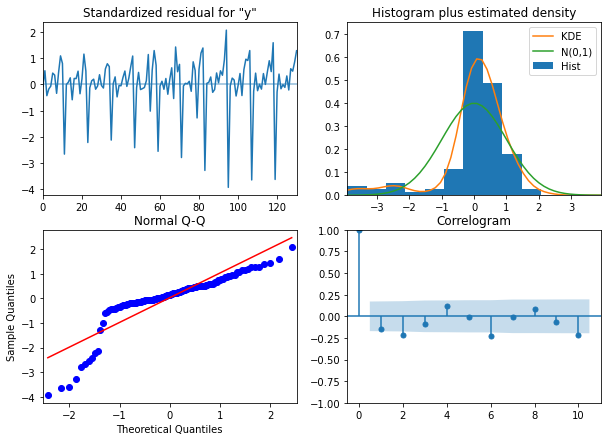

In [138]:
results_manual_ARIMA.plot_diagnostics();

In [139]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test['Sparkling']))

In [140]:
rmse_model_9_3 = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape_model_9_3 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse_model_9_3,'\nMAPE:',mape_model_9_3)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [141]:
resultsDf_9_3 = pd.DataFrame({'Test RMSE': rmse_model_9_3}
                           ,index=['Manual ARIMA(0,1,0)'])
resultsDf_9_3

Test RMSE
Manual ARIMA(0,1,0)  3864.279352

In [142]:
resultsDf = pd.concat([resultsDf, resultsDf_9_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
AUTO ARIMA(2,1,2)                                   1299.979779
AUTO SARIMA(3, 1, 2)(3, 0, 0, 12)                    543.170722
Manual ARIMA(0,1,0)                                 3864.279352

<font color='red'>Manual SARIMA</font>

<Figure size 576x360 with 0 Axes>

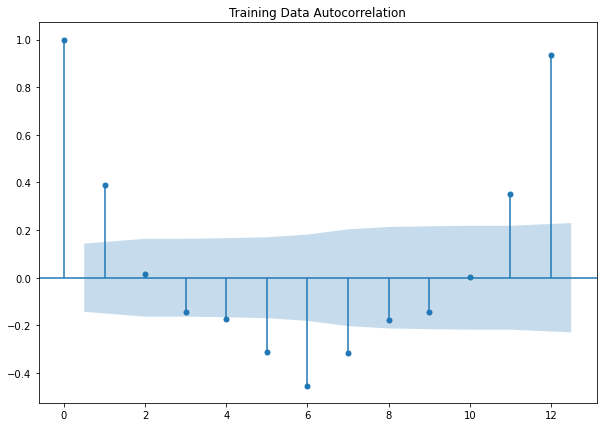

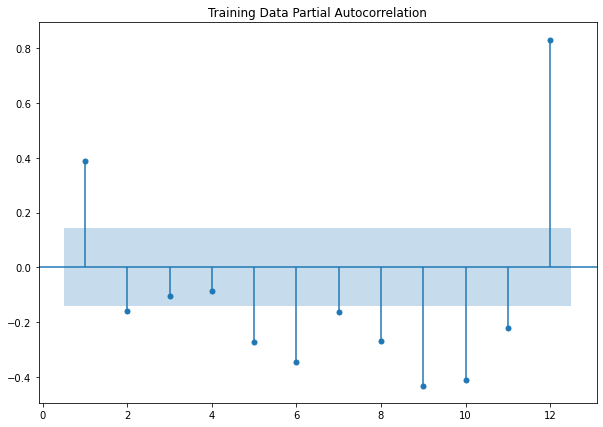

In [143]:
plt.figure(figsize=(8,5))
plot_acf(seasonal,lags =12,title='Training Data Autocorrelation',missing='drop')
plot_pacf(seasonal,lags =12,title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Q=7 P=10 D=0 S=12

The process is quite similar to non-seasonal AR, and you will still using the ACF and PACF function for that. To estimate the amount of AR terms, you will look one more time to the PACF function. Now, instead of count how many lollipops are out of the confidence interval, you will count how many seasonal lollipops are out.

The Q order can be calculated from the Autocorrelation (ACF) plot. Autocorrelation is the correlation of a single time series with a lagged copy of itself.

From the above graph, we note that the maximum lag with a value out the confidence intervals is 8, thus Q = 8.
Q=7(MA)<br>

In the PACF graph the maximum lag with a value out the confidence intervals (in light blue) is 12, thus we can set P = 12.
P=12(AR)<br>
D=0<br>
M=12<br>

The (P,D,Q,M) Order refers to the seasonal component of the model for the Auto Regressive parameters, differences, Moving Average parameters, and periodicity:
D indicates the integration order of the seasonal process (the number of transformation needed to make stationary the time series)
P indicates the Auto Regressive order for the seasonal component
Q indicated the Moving Average order for the seasonal component
M indicates the periodicity, i.e. the number of periods in season, such as 12 for monthly data.

In [144]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -900.495
Date:                              Sun, 13 Feb 2022   AIC                           1806.991
Time:                                      09:27:29   BIC                           1815.303
Sample:                                  01-01-1980   HQIC                          1810.365
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0325      0.019     52.957      0.000       0.994       1.071
ma.S.L12      -0.53

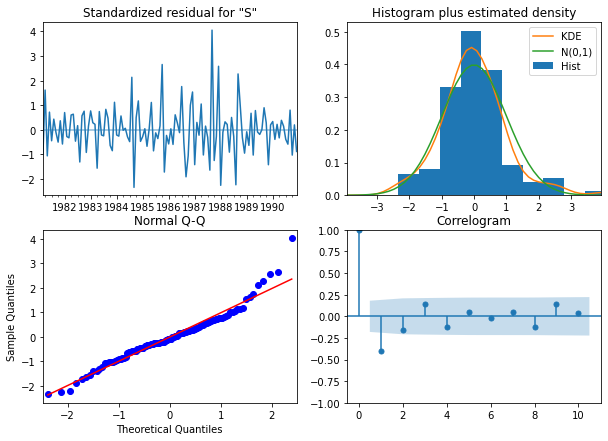

In [145]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [146]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test['Sparkling']))

In [147]:
rmse_model_9_4 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape_model_9_4 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse_model_9_4,'\nMAPE:',mape_model_9_4)

RMSE: 1787.706702693482 
MAPE: 85.15668005499454


In [148]:
resultsDf_9_4 = pd.DataFrame({'Test RMSE': rmse_model_9_4}
                           ,index=['Manual SARIMA(0,1,0)(1, 0, 1, 12)'])
resultsDf_9_4

Test RMSE
Manual SARIMA(0,1,0)(1, 0, 1, 12)  1787.706703

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [149]:
resultsDf = pd.concat([resultsDf, resultsDf_9_4])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
AUTO ARIMA(2,1,2)                                   1299.979779
AUTO SARIMA(3, 1, 2)(3, 0, 0, 12)                    543.170722
Manual ARIMA(0,1,0)                                 3864.279352
Manual SARIMA(0,1,0)(1, 0, 1, 12)                   1787.706703

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [150]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...   469.591516
AUTO SARIMA(3, 1, 2)(3, 0, 0, 12)                    543.170722
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.01,SimpleExponentialSmoothing               1286.648058
AUTO ARIMA(2,1,2)                                   1299.979779
Alpha=0.070,SimpleExponentialSmoothing              1338.007771
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Manual SARIMA(0,1,0)(1, 0, 1, 12)                   1787.706703
NaiveModel                                          3864.279352
Manual ARIMA(0,1,0)                                 3864.279352

In [151]:
fullmodel1 = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2)

In [152]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 376.7746175153367


In [153]:
len(test['Sparkling'])/12

4.583333333333333

In [154]:
prediction_a = fullmodel1.forecast(steps=len(test['Sparkling']))

<AxesSubplot:xlabel='YearMonth'>

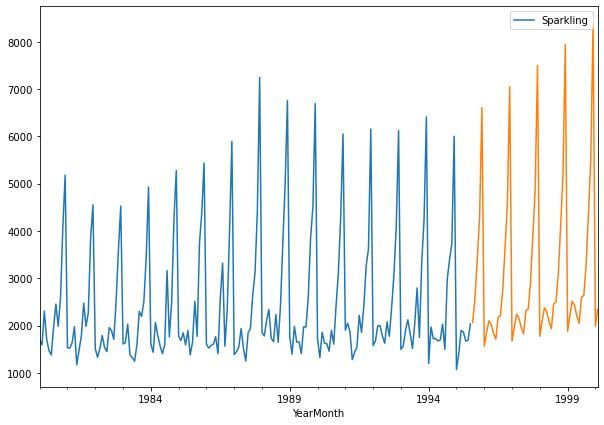

In [155]:
df.plot()
prediction_a.plot()

In [156]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

In [157]:
prediction_1

1995-08-01    2063.448928
1995-09-01    2579.407431
1995-10-01    3416.654241
1995-11-01    4304.476935
1995-12-01    6604.875995
1996-01-01    1564.539687
1996-02-01    1849.759839
1996-03-01    2098.878757
1996-04-01    2022.428764
1996-05-01    1834.540611
1996-06-01    1712.408856
1996-07-01    2176.425389
Freq: MS, dtype: float64

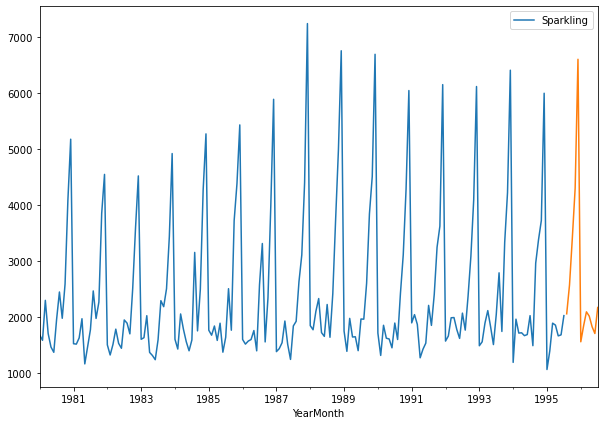

In [158]:
df.plot()
prediction_1.plot();

In [159]:
# fullmodel1.summary()
# 1.96*np.std(fullmodel1.resid,ddof=1)
# fullmodel1.resid
# pred_1_df.index

In [160]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1322.989263  2063.448928  2803.908592
1995-09-01  1838.947766  2579.407431  3319.867096
1995-10-01  2676.194577  3416.654241  4157.113906
1995-11-01  3564.017270  4304.476935  5044.936599
1995-12-01  5864.416331  6604.875995  7345.335660

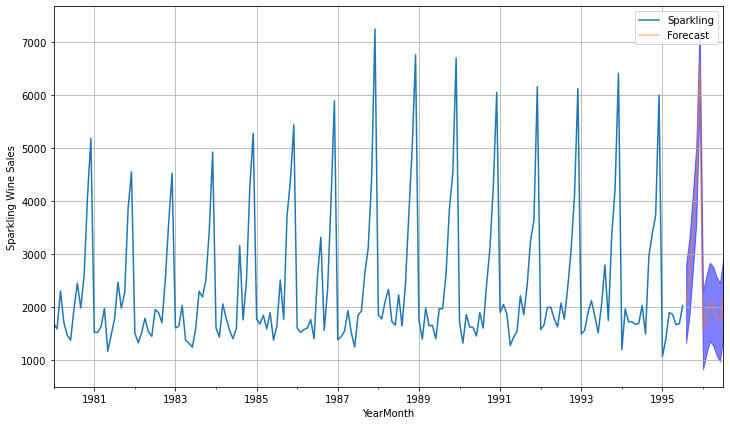

In [161]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,7))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='b', alpha=.5)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

# ************

# <font color='green'>Rose Wine</font>

# 1. Read the data as an appropriate Time Series data and plot the data.

In [162]:
rdf = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
rdf.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

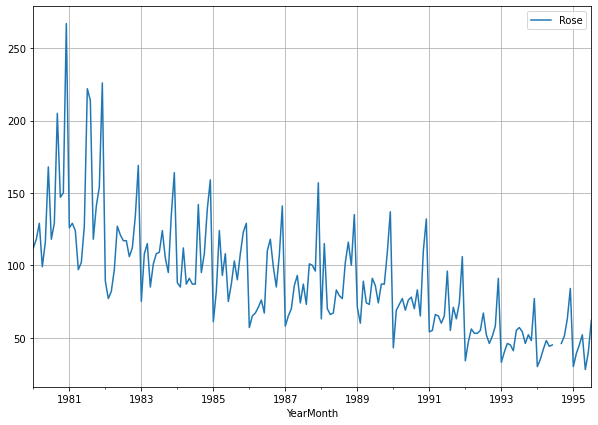

In [163]:
rdf.plot(grid=True);

In [164]:
rdf.isna().sum()

Rose    2
dtype: int64

In [165]:
rdf.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [166]:
bnull=pd.isnull(rdf['Rose'])
rdf[bnull]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [167]:
rdf['1994'].tail(6)

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

In [168]:
rdf.interpolate(method='spline',order=1,axis=0,inplace=True)

In [169]:
rdf['1994']

Rose
YearMonth            
1994-01-01  30.000000
1994-02-01  35.000000
1994-03-01  42.000000
1994-04-01  48.000000
1994-05-01  44.000000
1994-06-01  45.000000
1994-07-01  46.153199
1994-08-01  47.211982
1994-09-01  46.000000
1994-10-01  51.000000
1994-11-01  63.000000
1994-12-01  84.000000

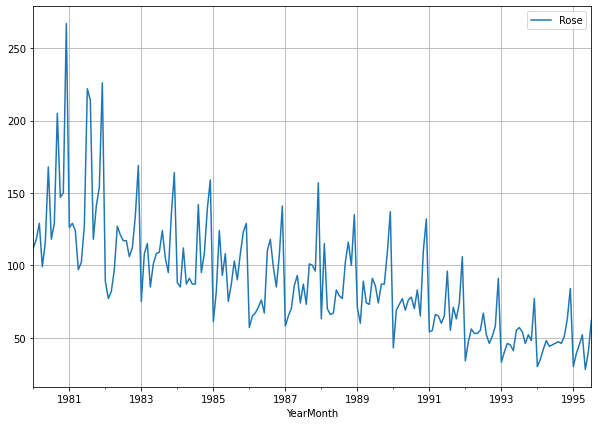

In [170]:
rdf.plot(grid=True);

In [171]:
rdf.describe()

Rose
count  187.000000
mean    89.927087
std     39.224153
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

## Yearly Boxplot

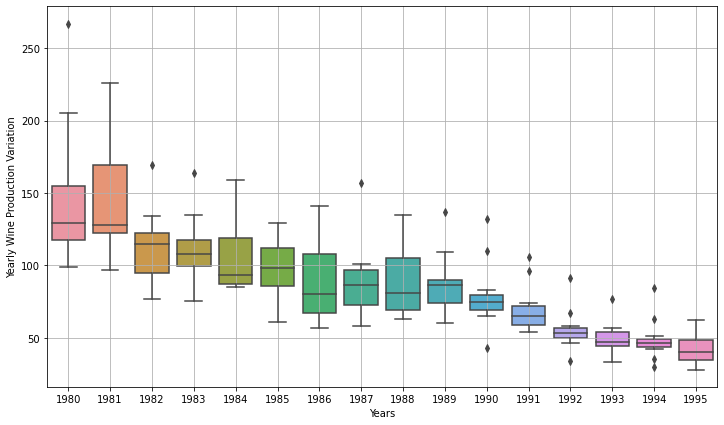

In [172]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x=rdf.index.year,y=rdf.values[:,0], ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

## Monthly Boxplot

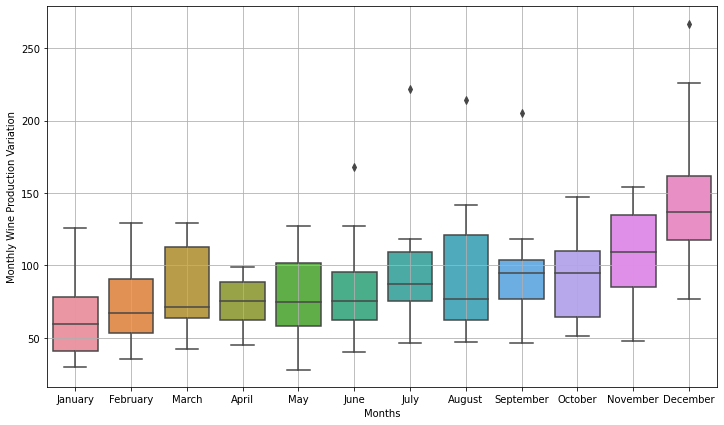

In [173]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x=rdf.index.month_name(),y=rdf['Rose'], ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Production Variation');

## Plot a time series monthplot to understand the spread of wine sales across different years and within different months across years.


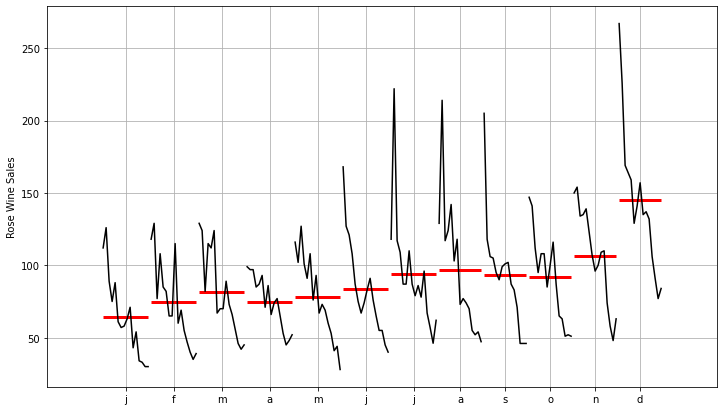

In [174]:
from statsmodels.graphics.tsaplots import month_plot
rcParams['figure.figsize'] = 12,7
month_plot(rdf['Rose'],ylabel='Rose Wine Sales')
plt.grid();

In [175]:
rmonthly_sales_across_years = pd.pivot_table(rdf, values = 'Rose', columns = rdf.index.month, index = rdf.index.year)
rmonthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   46.153199   47.211982   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

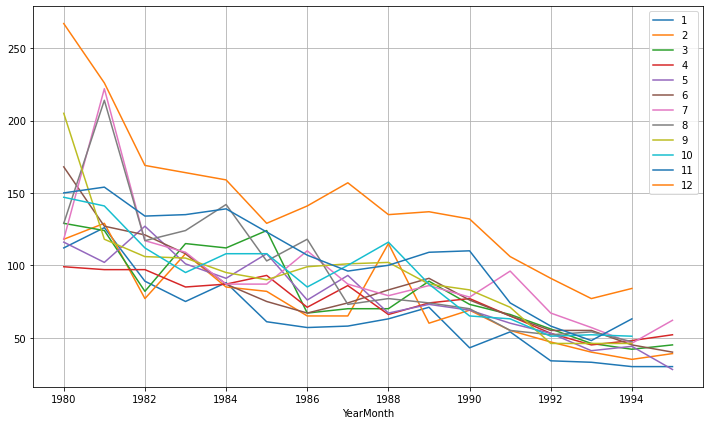

In [176]:
rmonthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

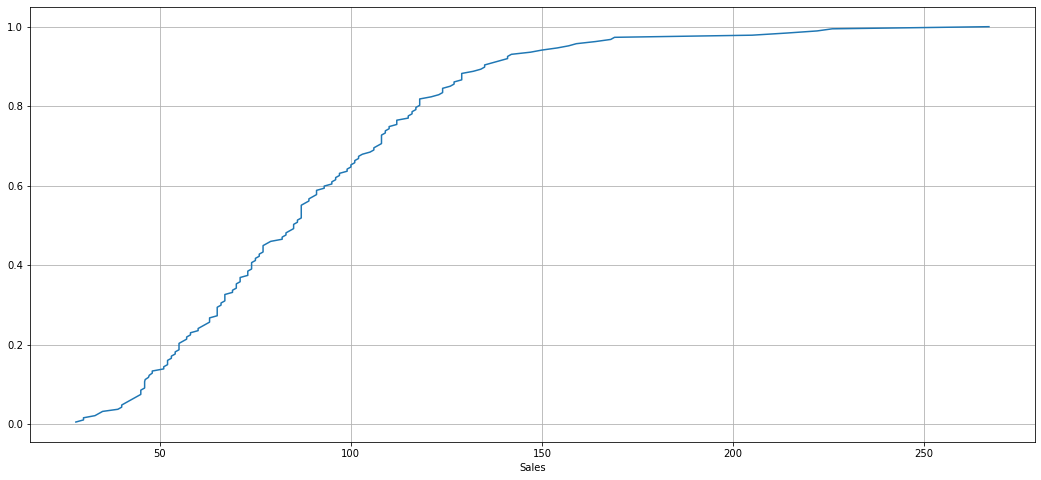

In [177]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(rdf['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [178]:
# year-end
rdf_yearly_sum = rdf.resample('A').sum()
rdf_yearly_sum.head()

Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

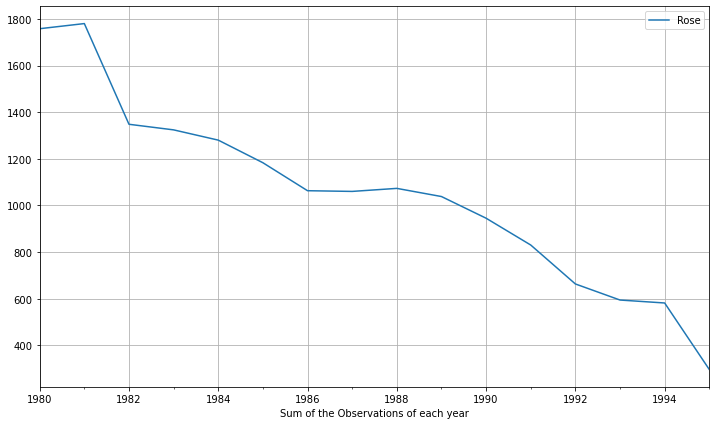

In [179]:
rdf_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [180]:
rdf_yearly_mean = rdf.resample('Y').mean()
rdf_yearly_mean.head()

Rose
YearMonth             
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

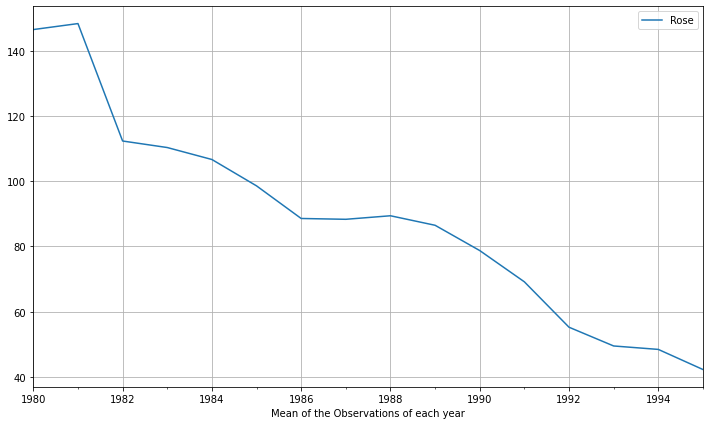

In [181]:
rdf_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [182]:
rdf_quarterly_sum = rdf.resample('Q').sum()
rdf_quarterly_sum.head()

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

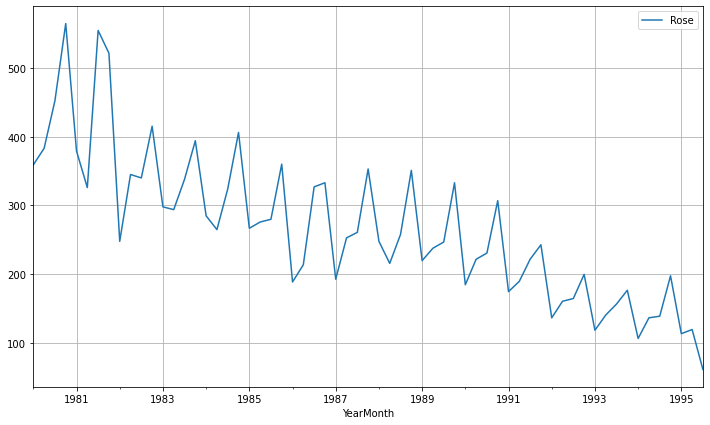

In [183]:
rdf_quarterly_sum.plot();
plt.grid()

In [184]:
rdf_quarterly_mean = rdf.resample('Q').mean()
rdf_quarterly_mean.head()

Rose
YearMonth             
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

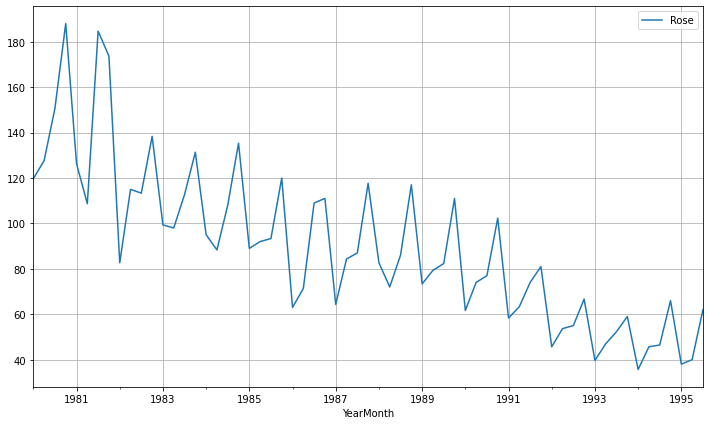

In [185]:
rdf_quarterly_mean.plot();
plt.grid()

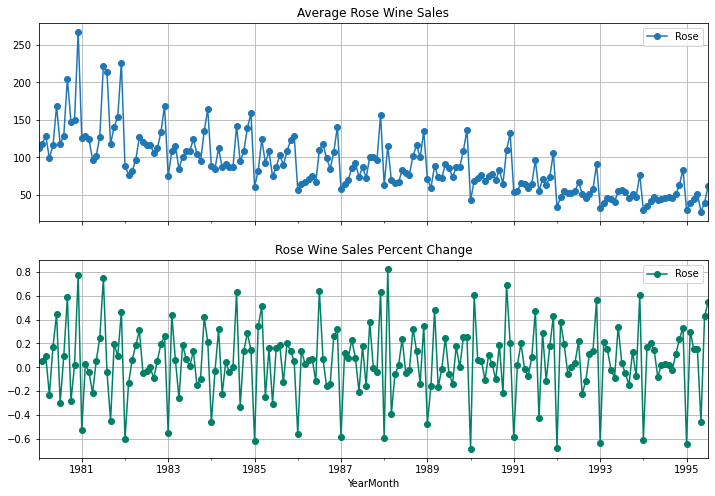

In [186]:
# group by date and get average WineSales, and precent change
average    = rdf.groupby(rdf.index)["Rose"].mean()
pct_change = rdf.groupby(rdf.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(12,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

In [187]:
# decomposition1 = seasonal_decompose(rdf,model='additive')
# decomposition1.plot();

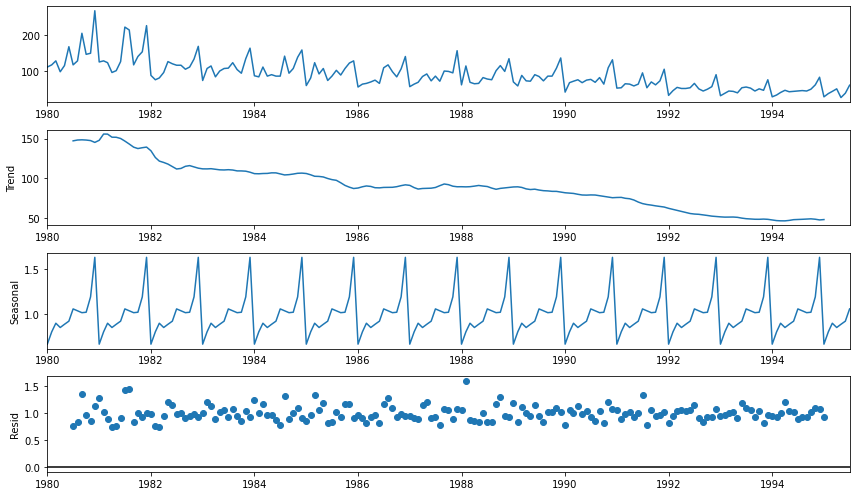

In [188]:
decomposition1 = seasonal_decompose(rdf,model='multiplicative')
decomposition1.plot();

In [189]:
trend1 = decomposition1.trend
seasonality1 = decomposition1.seasonal
residual1 = decomposition1.resid

In [190]:
print('Trend','\n',trend1.head(12),'\n')
print('Seasonality','\n',seasonality1.head(12),'\n')
print('Residual','\n',residual1.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
1980-06-01    0.923718
1980-07-01    1.058920
1980-08-01    1.037754
1980-09-01    1.017402
1980-10-01    1.022303
1980-11-01    1.192007
1980-12-01    1.628173
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.757627
1980-08-01    0.839203
1980-09-01    1.358003
1980-10-01    0.971028
1980-11-01    0.853623
1980-12-01    1.129974
Name: resid, dtype: fl

In [191]:
deaseasonalized_ts1 = trend1 + residual1
deaseasonalized_ts1.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.840960
1980-08-01    148.964203
1980-09-01    149.733003
1980-10-01    149.054361
1980-11-01    148.270290
1980-12-01    146.254974
dtype: float64

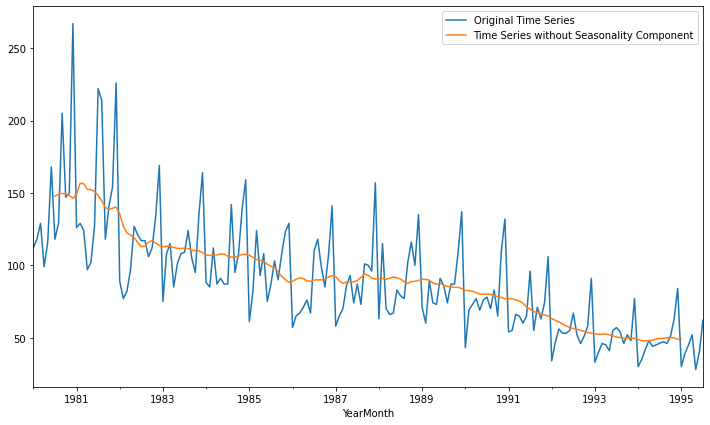

In [192]:
rdf.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# 3. Split the data into training and test. The test data should start in 1991.

In [193]:
rtrain = rdf[rdf.index<'1991'] 
rtest = rdf[rdf.index>='1991']

In [194]:
print('First few rows of Training Data')
display(rtrain.head())
print('Last few rows of Training Data')
display(rtrain.tail())
print('First few rows of Test Data')
display(rtest.head())
print('Last few rows of Test Data')
display(rtest.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [195]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


Text(0.5, 1.0, 'Rose Sales')

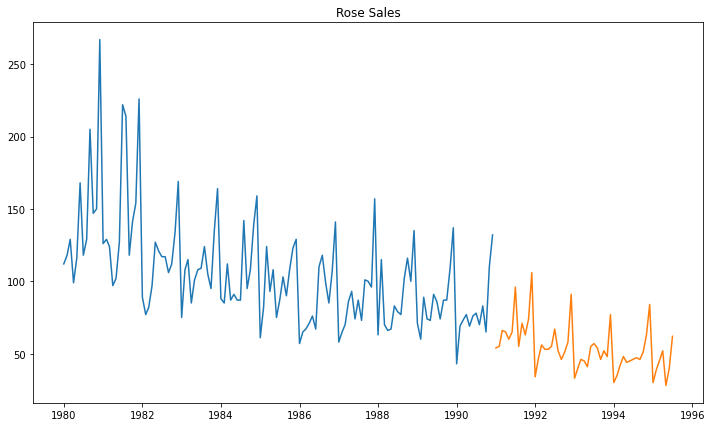

In [196]:
plt.plot(rtrain['Rose'])
plt.plot(rtest['Rose'])
plt.title('Rose Sales')

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

**Method 1: Linear Regression**

In [197]:
rtrain_time = [i+1 for i in range(len(rtrain))]
rtest_time = [i+133 for i in range(len(rtest))]
print('Training Time instance','\n',rtrain_time)
print('Test Time instance','\n',rtest_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [198]:
rLinearRegression_train = rtrain.copy()
rLinearRegression_test = rtest.copy()

In [199]:
rLinearRegression_train['time'] = rtrain_time
rLinearRegression_test['time'] = rtest_time

print('First few rows of Training Data','\n',rLinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',rLinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',rLinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',rLinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [200]:
lr1 = LinearRegression()
lr1.fit(rLinearRegression_train[['time']],rLinearRegression_train['Rose'].values)

LinearRegression()

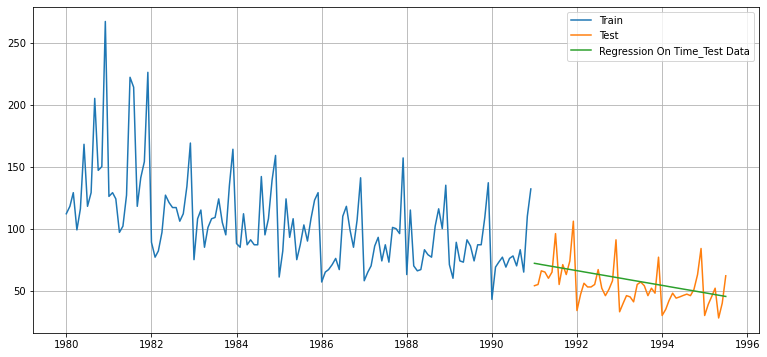

In [201]:
rtest_predictions_model1 = lr1.predict(rLinearRegression_test[['time']])
rLinearRegression_test['RegOnTime'] = rtest_predictions_model1
plt.figure(figsize=(13,6))
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(rLinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [202]:
rrmse_model1_test = metrics.mean_squared_error(rtest['Rose'],rtest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255


In [203]:
rresultsDf = pd.DataFrame({'Test RMSE': [rrmse_model1_test]},index=['RegressionOnTime'])
rresultsDf

Test RMSE
RegressionOnTime  15.255492

**Naive Approach**

In [204]:
rNaiveModel_train = rtrain.copy()
rNaiveModel_test = rtest.copy()

In [205]:
rNaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
rNaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

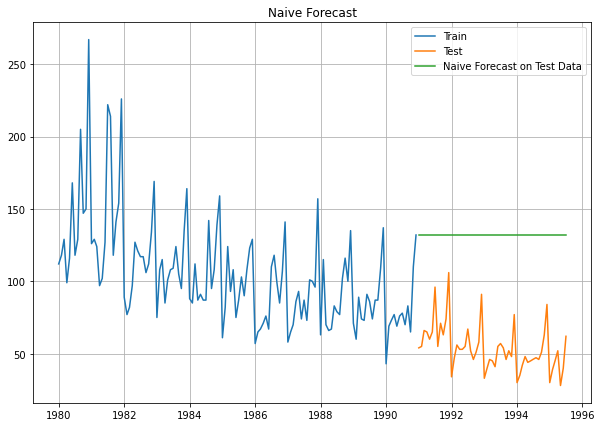

In [206]:
plt.figure(figsize=(10,7))
plt.plot(rNaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(rNaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [207]:
# Test Data - RMSE

rrmse_model2_test = metrics.mean_squared_error(rtest['Rose'],rNaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.672


In [208]:
rresultsDf_2 = pd.DataFrame({'Test RMSE': [rrmse_model2_test]},index=['NaiveModel'])
rresultsDf = pd.concat([rresultsDf, rresultsDf_2])
rresultsDf

Test RMSE
RegressionOnTime  15.255492
NaiveModel        79.672475

**Simple Average**

In [209]:
rSimpleAverage_train = rtrain.copy()
rSimpleAverage_test = rtest.copy()

In [210]:
rSimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
rSimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

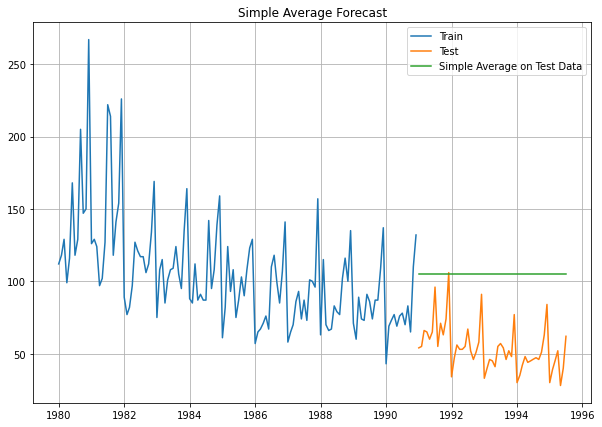

In [211]:
plt.figure(figsize=(10,7))
plt.plot(rSimpleAverage_train['Rose'], label='Train')
plt.plot(rSimpleAverage_test['Rose'], label='Test')
plt.plot(rSimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [212]:
rrmse_model3_test = metrics.mean_squared_error(rtest['Rose'],rSimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [213]:
rresultsDf_3 = pd.DataFrame({'Test RMSE': [rrmse_model3_test]},index=['SimpleAverageModel'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_3])
rresultsDf

Test RMSE
RegressionOnTime    15.255492
NaiveModel          79.672475
SimpleAverageModel  53.413298

**Moving Average(MA)**

In [214]:
# entire data
rMovingAverage = rdf.copy()
rMovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [215]:
rMovingAverage['Trailing_2'] = rMovingAverage['Rose'].rolling(2).mean()
rMovingAverage['Trailing_4'] = rMovingAverage['Rose'].rolling(4).mean()
# rMovingAverage['Trailing_6'] = rMovingAverage['Rose'].rolling(6).mean()
# rMovingAverage['Trailing_9'] = rMovingAverage['Rose'].rolling(9).mean()

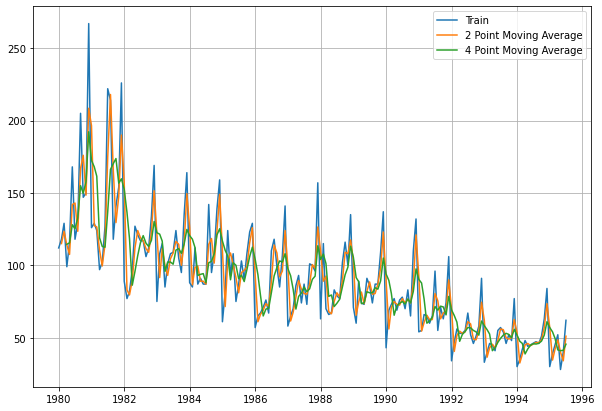

In [216]:
## Plotting on the whole data

plt.figure(figsize=(10,7))
plt.plot(rMovingAverage['Rose'], label='Train')
plt.plot(rMovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(rMovingAverage['Trailing_4'], label='4 Point Moving Average')
# plt.plot(rMovingAverage['Trailing_6'],label = '6 Point Moving Average')
# plt.plot(rMovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [217]:
#Creating train and test set 
rtrailing_MovingAverage_train=rMovingAverage[rMovingAverage.index.year < 1991] 
rtrailing_MovingAverage_test=rMovingAverage[rMovingAverage.index.year >= 1991]

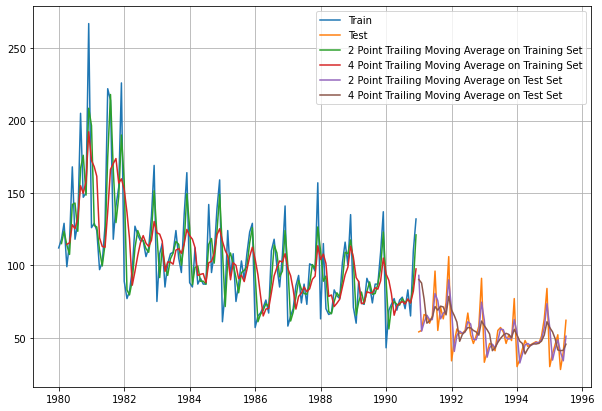

In [218]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,7))
plt.plot(rtrailing_MovingAverage_train['Rose'], label='Train')
plt.plot(rtrailing_MovingAverage_test['Rose'], label='Test')

plt.plot(rtrailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(rtrailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
# plt.plot(rtrailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
# plt.plot(rtrailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(rtrailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
# plt.plot(rtrailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
# plt.plot(rtrailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [219]:
## Test Data - RMSE --> 2 point Trailing MA

rrmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rrmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rrmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rrmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

# rrmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_6'],squared=False)
# print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rrmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

# rrmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_9'],squared=False)
# print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rrmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444


In [220]:
rresultsDf_4 = pd.DataFrame({'Test RMSE': [rrmse_model4_test_2,rrmse_model4_test_4,]}
#                                           rrmse_model4_test_6,rrmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'])
#                                    '6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_4])
rresultsDf

Test RMSE
RegressionOnTime             15.255492
NaiveModel                   79.672475
SimpleAverageModel           53.413298
2pointTrailingMovingAverage  11.529985
4pointTrailingMovingAverage  14.444375

# Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

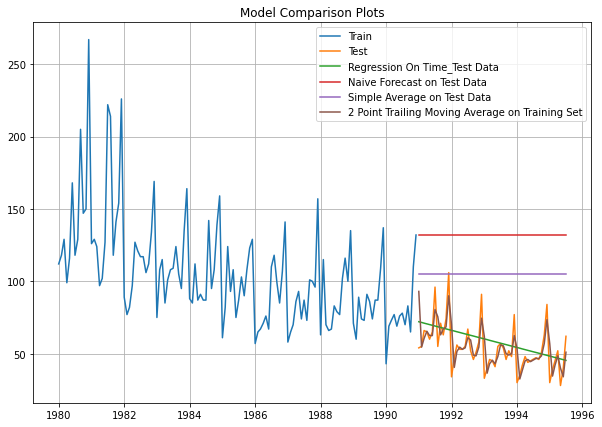

In [221]:
## Plotting on both Training and Test data

plt.figure(figsize=(10,7))
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(rLinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(rNaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(rSimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(rtrailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

**Simple Exponential Smoothing**

In [222]:
rSES_train = rtrain.copy()
rSES_test = rtest.copy()

In [223]:
rmodel_SES = SimpleExpSmoothing(rSES_train['Rose'],initialization_method='estimated')

In [224]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
rmodel_SES_autofit = rmodel_SES.fit(optimized=True)

In [225]:
rmodel_SES_autofit.params

{'smoothing_level': 0.09874977691291693,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38715339104687,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [226]:
rSES_test['predict'] = rmodel_SES_autofit.forecast(steps=len(rtest['Rose']))
rSES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104996
1991-02-01  55.0  87.104996
1991-03-01  66.0  87.104996
1991-04-01  65.0  87.104996
1991-05-01  60.0  87.104996

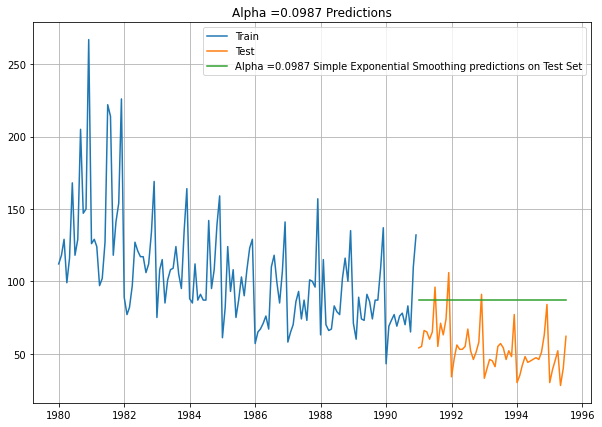

In [227]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,7))
plt.plot(rSES_train['Rose'], label='Train')
plt.plot(rSES_test['Rose'], label='Test')

plt.plot(rSES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

In [228]:
rrmse_model5_test_1 = metrics.mean_squared_error(rSES_test['Rose'],rSES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rrmse_model5_test_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.748


In [229]:
rresultsDf_5 = pd.DataFrame({'Test RMSE': [rrmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_5])
rresultsDf

Test RMSE
RegressionOnTime                         15.255492
NaiveModel                               79.672475
SimpleAverageModel                       53.413298
2pointTrailingMovingAverage              11.529985
4pointTrailingMovingAverage              14.444375
Alpha=0.0987,SimpleExponentialSmoothing  36.748401

In [230]:
# Setting different alpha values.
rresultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
rresultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [231]:
# for i in np.arange(0.1,1,0.1):
alpha=[0.01,0.05,0.1,0.2]
for i in alpha:
    rmodel_SES_alpha_i = rmodel_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    rSES_train['predict',i] = rmodel_SES_alpha_i.fittedvalues
    rSES_test['predict',i] = rmodel_SES_alpha_i.forecast(len(rSES_test['Rose']))
    
    rrmse_model5_train_i = metrics.mean_squared_error(rSES_train['Rose'],rSES_train['predict',i],squared=False)
    
    rrmse_model5_test_i = metrics.mean_squared_error(rSES_test['Rose'],rSES_test['predict',i],squared=False)
    
    rresultsDf_6 = rresultsDf_6.append({'Alpha Values':i,'Train RMSE':rrmse_model5_train_i 
                                      ,'Test RMSE':rrmse_model5_test_i}, ignore_index=True)

In [232]:
rresultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
2          0.10   32.253385  36.780184
1          0.05   33.193280  36.950813
3          0.20   32.155991  41.314129
0          0.01   35.889833  47.459871

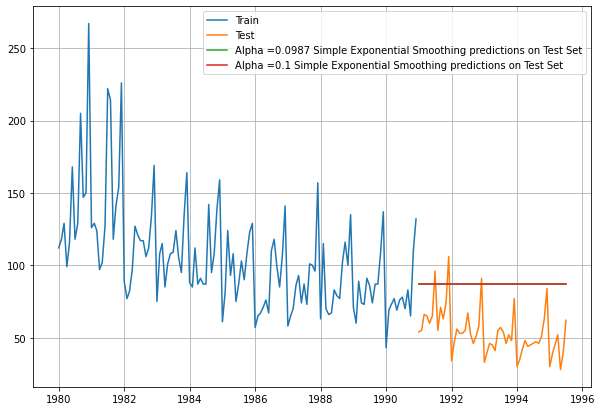

In [233]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,7))
plt.plot(rSES_train['Rose'], label='Train')
plt.plot(rSES_test['Rose'], label='Test')

plt.plot(rSES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(rSES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [234]:
rresultsDf_6_1 = pd.DataFrame({'Test RMSE': [rresultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_6_1])
rresultsDf

Test RMSE
RegressionOnTime                         15.255492
NaiveModel                               79.672475
SimpleAverageModel                       53.413298
2pointTrailingMovingAverage              11.529985
4pointTrailingMovingAverage              14.444375
Alpha=0.0987,SimpleExponentialSmoothing  36.748401
Alpha=0.1,SimpleExponentialSmoothing     36.780184

**Holt's Model (Double Exponential Smoothing)**

In [235]:
rDES_train = rtrain.copy()
rDES_test = rtest.copy()

In [236]:
rmodel_DES = Holt(rDES_train['Rose'])

In [237]:
rresultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
rresultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [238]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        rmodel_DES_alpha_i_j = rmodel_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        rDES_train['predict',i,j] = rmodel_DES_alpha_i_j.fittedvalues
        rDES_test['predict',i,j] = rmodel_DES_alpha_i_j.forecast(len(rDES_test['Rose']))
        
        rrmse_model6_train = metrics.mean_squared_error(rDES_train['Rose'],rDES_train['predict',i,j],squared=False)
        
        rrmse_model6_test = metrics.mean_squared_error(rDES_test['Rose'],rDES_test['predict',i,j],squared=False)
        
        rresultsDf_7 = rresultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rrmse_model6_train
                                          ,'Test RMSE':rrmse_model6_test}, ignore_index=True)

In [239]:
rresultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.874004
1            0.1          0.2   33.450729   48.634943
2            0.1          0.3   33.145789   78.100383
3            0.1          0.4   33.262191   99.526502
4            0.1          0.5   33.688415  124.212282
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.622524
96           1.0          0.7   54.497039  841.834847
97           1.0          0.8   57.365879  853.907801
98           1.0          0.9   60.474309  834.653214
99           1.0          1.0   63.873454  780.021904

[100 rows x 4 columns]

In [240]:
rresultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.874004
1            0.1          0.2   33.450729  48.634943
10           0.2          0.1   33.097427  65.677796
2            0.1          0.3   33.145789  78.100383
20           0.3          0.1   33.611269  98.598321

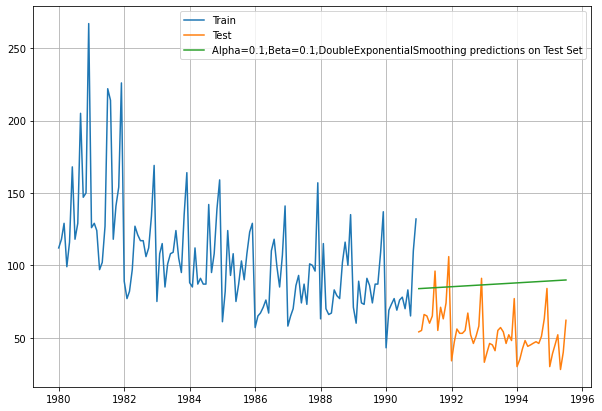

In [241]:
plt.figure(figsize=(10,7))
plt.plot(rDES_train['Rose'], label='Train')
plt.plot(rDES_test['Rose'], label='Test')

plt.plot(rDES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [242]:
rresultsDf_7_1 = pd.DataFrame({'Test RMSE': [rresultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_7_1])
rresultsDf

Test RMSE
RegressionOnTime                               15.255492
NaiveModel                                     79.672475
SimpleAverageModel                             53.413298
2pointTrailingMovingAverage                    11.529985
4pointTrailingMovingAverage                    14.444375
Alpha=0.0987,SimpleExponentialSmoothing        36.748401
Alpha=0.1,SimpleExponentialSmoothing           36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.874004

<font color='blue'>Holt-Winter's Model (Triple Exponential Smoothing)</font>

In [243]:
rTES_train = rtrain.copy()
rTES_test = rtest.copy()

In [244]:
# rTES_train

In [245]:
rmodel_TES = ExponentialSmoothing(rTES_train['Rose'],trend='additive',seasonal='multiplicative')

In [246]:
rmodel_TES_autofit = rmodel_TES.fit()

In [247]:
rmodel_TES_autofit.params

{'smoothing_level': 0.06510835164907584,
 'smoothing_trend': 0.0526680481502012,
 'smoothing_seasonal': 4.344025903267054e-06,
 'damping_trend': nan,
 'initial_level': 59.16824915075656,
 'initial_trend': -0.3671450798562006,
 'initial_seasons': array([1.90546121, 2.16212462, 2.36216206, 2.06486336, 2.32130366,
        2.5309818 , 2.78210303, 2.95869941, 2.80670038, 2.74618658,
        3.2011441 , 4.41498767]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [248]:
rTES_test['auto_predict'] = rmodel_TES_autofit.forecast(steps=len(rTES_test['Rose']))
rTES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.728590
1991-02-01  55.0     64.177618
1991-03-01  66.0     69.905043
1991-04-01  65.0     60.923227
1991-05-01  60.0     68.282744

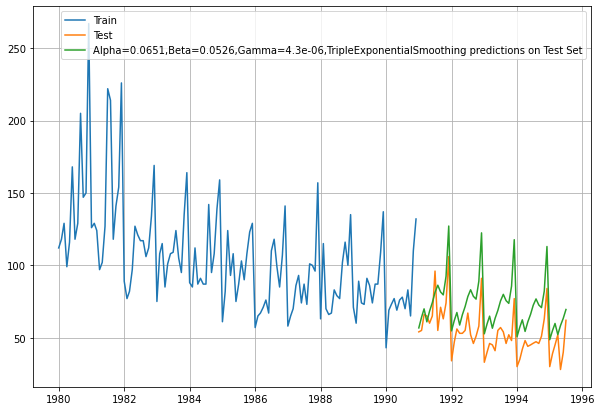

In [249]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(10,7))
plt.plot(rTES_train['Rose'], label='Train')
plt.plot(rTES_test['Rose'], label='Test')

plt.plot(rTES_test['auto_predict'], label='Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [250]:
## Test Data

rrmse_model6_test_1 = metrics.mean_squared_error(rTES_test['Rose'],rTES_test['auto_predict'],squared=False)
print("For Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model6_test_1))

For Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.038


In [251]:
rresultsDf_8_1 = pd.DataFrame({'Test RMSE': [rrmse_model6_test_1]}
                           ,index=['Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleExponentialSmoothing'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_8_1])
rresultsDf

Test RMSE
RegressionOnTime                                    15.255492
NaiveModel                                          79.672475
SimpleAverageModel                                  53.413298
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637

In [252]:
## First we will define an empty dataframe to store our values from the loop

rresultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
rresultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [253]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            rmodel_TES_alpha_i_j_k = rmodel_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rTES_train['predict',i,j,k] = rmodel_TES_alpha_i_j_k.fittedvalues
            rTES_test['predict',i,j,k] = rmodel_TES_alpha_i_j_k.forecast(len(rTES_test['Rose']))
        
            rrmse_model8_train = metrics.mean_squared_error(rTES_train['Rose'],rTES_train['predict',i,j,k],squared=False)
            
            rrmse_model8_test = metrics.mean_squared_error(rTES_test['Rose'],rTES_test['predict',i,j,k],squared=False)
            
            rresultsDf_8_2 = rresultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rrmse_model8_train,'Test RMSE':rrmse_model8_test}
                                                 , ignore_index=True)

In [254]:
rresultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1     25.216699     12.765755
1             0.1          0.1           0.2     24.057626     11.886524
2             0.1          0.1           0.3     23.645037     11.825901
3             0.1          0.1           0.4     23.570939     12.110032
4             0.1          0.1           0.5     23.718878     12.619363
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  28358.458519   9603.625727
996           1.0          1.0           0.7  30724.126331  23029.955195
997           1.0          1.0           0.8   1218.755446   9626.719038
998           1.0          1.0           0.9  14150.253251   9691.906775
999           1.0          1.0           1.0   1768.254189   8138.625255

[1000 rows x 5 columns]

In [255]:
rresultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
11            0.1          0.2           0.2   24.365597   9.628012
12            0.1          0.2           0.3   23.969166   9.923487
10            0.1          0.2           0.1   25.529854   9.940633
142           0.2          0.5           0.3   27.631767  10.053020
151           0.2          0.6           0.2   28.289836  10.059361

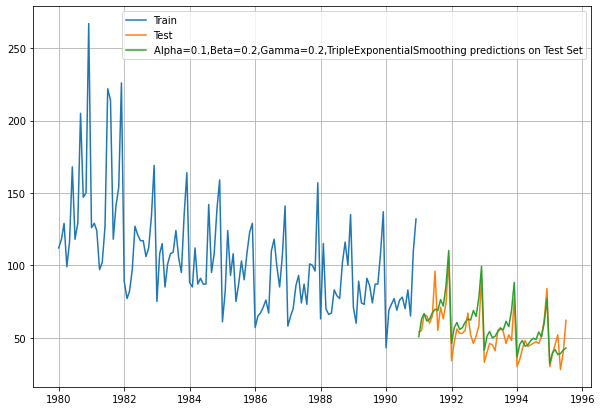

In [256]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(10,7))
plt.plot(rTES_train['Rose'], label='Train')
plt.plot(rTES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(rTES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [257]:
rresultsDf_8_3 = pd.DataFrame({'Test RMSE': [rresultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

rresultsDf = pd.concat([rresultsDf, rresultsDf_8_3])
rresultsDf

Test RMSE
RegressionOnTime                                    15.255492
NaiveModel                                          79.672475
SimpleAverageModel                                  53.413298
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012

# Best Model so far

In [258]:
print('Sorted by RMSE values on the Test Data:','\n',)
rresultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
RegressionOnTime                                    15.255492
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
SimpleAverageModel                                  53.413298
NaiveModel                                          79.672475

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

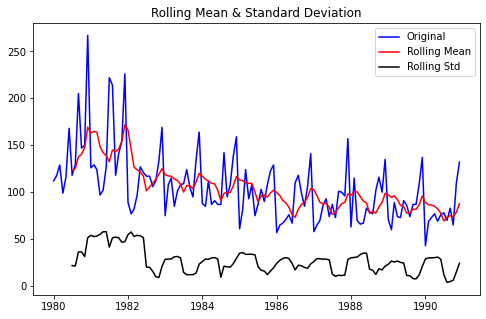

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [259]:
plt.figure(figsize=(8,5))
test_stationarity(rtrain['Rose'])

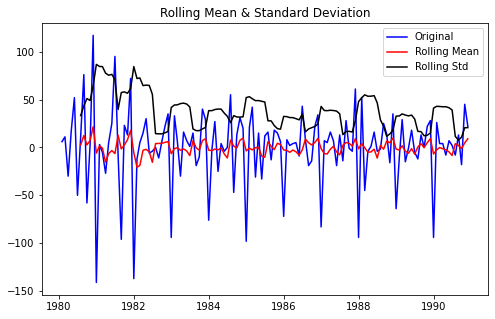

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [260]:
plt.figure(figsize=(8,5))
test_stationarity(rtrain['Rose'].diff().dropna())

In [261]:
# rdftest = adfuller(rdf,regression='ct')
# print('DF test statistic is %3.3f' %rdftest[0])
# print('DF test p-value is' ,rdftest[1])
# print('Number of lags used' ,rdftest[2])
# print(rdftest)

In [262]:
# rdftest = adfuller(rdf.diff().dropna(),regression='ct')
# print('DF test statistic is %3.3f' %rdftest[0])
# print('DF test p-value is' ,rdftest[1])
# print('Number of lags used' ,rdftest[2])

In [263]:
# rdf.diff().dropna().plot(grid=True);

<Figure size 576x360 with 0 Axes>

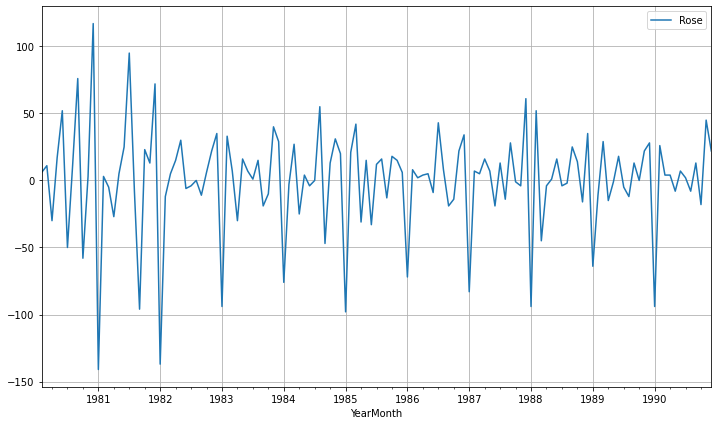

In [264]:
plt.figure(figsize=(8,5))
rtrain.diff().dropna().plot(grid=True);

In [265]:
rtrain['Rose'].head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [266]:
rtrain['Rose'].diff().values

array([  nan,    6.,   11.,  -30.,   17.,   52.,  -50.,   11.,   76.,
        -58.,    3.,  117., -141.,    3.,   -5.,  -27.,    5.,   25.,
         95.,   -8.,  -96.,   23.,   13.,   72., -137.,  -12.,    5.,
         15.,   30.,   -6.,   -4.,    0.,  -11.,    6.,   22.,   35.,
        -94.,   33.,    7.,  -30.,   16.,    7.,    1.,   15.,  -19.,
        -10.,   40.,   29.,  -76.,   -3.,   27.,  -25.,    4.,   -4.,
          0.,   55.,  -47.,   13.,   31.,   20.,  -98.,   21.,   42.,
        -31.,   15.,  -33.,   12.,   16.,  -13.,   18.,   15.,    6.,
        -72.,    8.,    2.,    4.,    5.,   -9.,   43.,    8.,  -19.,
        -14.,   22.,   34.,  -83.,    7.,    5.,   16.,    7.,  -19.,
         13.,  -14.,   28.,   -1.,   -4.,   61.,  -94.,   52.,  -45.,
         -4.,    1.,   16.,   -4.,   -2.,   25.,   14.,  -16.,   35.,
        -64.,  -11.,   29.,  -15.,   -1.,   18.,   -5.,  -12.,   13.,
          0.,   22.,   28.,  -94.,   26.,    4.,    4.,   -8.,    7.,
          2.,   -8.,

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

**AUTO ARIMA**

In [267]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [268]:
# Creating an empty Dataframe with column names only
rARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
rARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [269]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    rARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,rARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    rARIMA_AIC = rARIMA_AIC.append({'param':param, 'AIC': rARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.671528853578
ARIMA(0, 1, 3) - AIC:1280.5453761734661
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380082
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.870722330995
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.507862186846
ARIMA(2, 1, 2) - AIC:1281.870722226426
ARIMA(2, 1, 3) - AIC:1274.6950984794705
ARIMA(3, 1, 0) - AIC:1297.4810917271716
ARIMA(3, 1, 1) - AIC:1282.4192776271937
ARIMA(3, 1, 2) - AIC:1283.7207405977147
ARIMA(3, 1, 3) - AIC:1278.6583144202655


In [270]:
rARIMA_AIC.sort_values(by='AIC',ascending=True).head(3)

param          AIC
11  (2, 1, 3)  1274.695098
15  (3, 1, 3)  1278.658314
2   (0, 1, 2)  1279.671529

In [271]:
rauto_ARIMA = ARIMA(rtrain, order=(2,1,3))

rresults_auto_ARIMA = rauto_ARIMA.fit()

print(rresults_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 13 Feb 2022   AIC                           1274.695
Time:                        09:28:14   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.018      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.694      0.000      -0.893      -0.564
ma.L1          1.0448      0.649      1.609      0.1

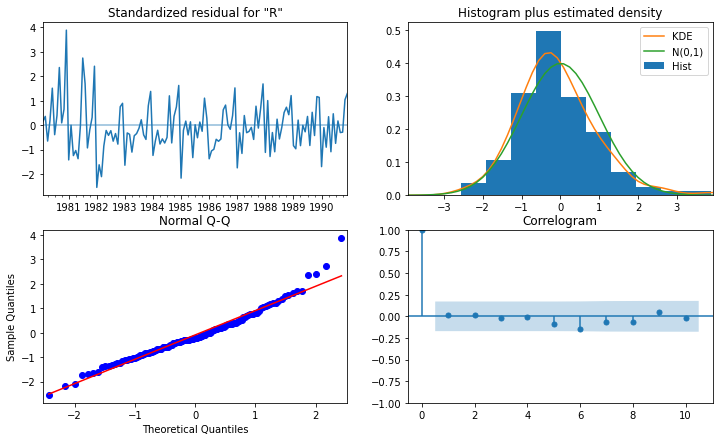

In [272]:
rresults_auto_ARIMA.plot_diagnostics();

In [273]:
rpredicted_auto_ARIMA = rresults_auto_ARIMA.forecast(steps=len(rtest['Rose']))

In [274]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [275]:
rrmse_model_9_1 = mean_squared_error(rtest['Rose'],rpredicted_auto_ARIMA,squared=False)
rmape_model_9_1 = mean_absolute_percentage_error(rtest['Rose'],rpredicted_auto_ARIMA)
print('RMSE:',rrmse_model_9_1,'\nMAPE:',rmape_model_9_1)

RMSE: 36.768357610170526 
MAPE: 75.66992136405763


In [276]:
rresultsDf_9_1 = pd.DataFrame({'Test RMSE': rrmse_model_9_1}
                           ,index=['AUTO ARIMA(2,1,3)'])

rresultsDf_9_1

Test RMSE
AUTO ARIMA(2,1,3)  36.768358

In [277]:
rresultsDf = pd.concat([rresultsDf, rresultsDf_9_1])
rresultsDf

Test RMSE
RegressionOnTime                                    15.255492
NaiveModel                                          79.672475
SimpleAverageModel                                  53.413298
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012
AUTO ARIMA(2,1,3)                                   36.768358

**AUTO SARIMA**

In [278]:
import itertools
p = q = range(0, 4)
d= range(1,2)
# we're not doing any seasonlity difference, hence it is 0. Since we're doing another PDQ...
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [279]:
seasonal1 = decomposition1.seasonal
check_stationarity(seasonality1)

The series is stationary


In [280]:
rSARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
rSARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [281]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        rSARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        rresults_SARIMA = rSARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, rresults_SARIMA.aic))
        rSARIMA_AIC = rSARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': rresults_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207318
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4021.076949102411
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385933
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752423
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:2504.402831731293
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069752
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945565
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3677.365711143881
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702731286
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128359
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3530.0677909583105
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2922.5652011471484
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.518160809648
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369704
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866294078
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2901.8719550175015
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600272124
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259124058
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887039858
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3496.474914109064
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146662
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598188
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311117127
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3548.000589312496
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.291271371709
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353488034
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488802582
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2481.4681902776247
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441598038
SARIMA(2, 1, 2)x(2, 0, 

In [282]:
rSARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880937
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [283]:
import statsmodels.api as sm

rauto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'].diff(),
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
rresults_auto_SARIMA = rauto_SARIMA.fit(maxiter=1000)
print(rresults_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -391.557
Date:                                 Sun, 13 Feb 2022   AIC                            803.114
Time:                                         09:36:15   BIC                            828.332
Sample:                                     01-01-1980   HQIC                           813.292
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6115      0.124     -4.918      0.000      -0.855      -0

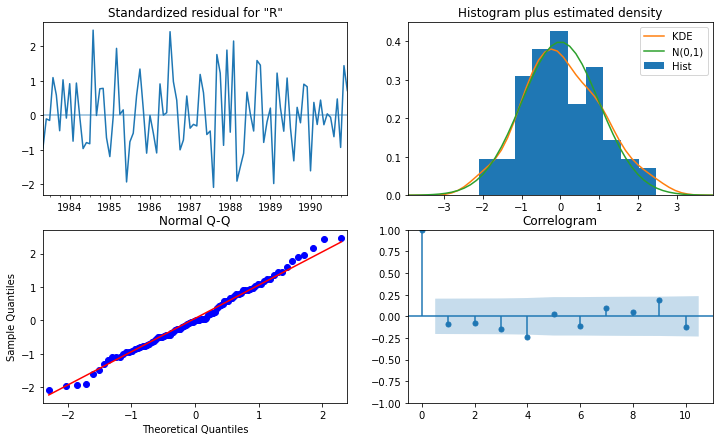

In [284]:
rresults_auto_SARIMA.plot_diagnostics();

In [285]:
rpredicted_auto_SARIMA = rresults_auto_SARIMA.get_forecast(steps=len(rtest['Rose']))

In [286]:
rpredicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01 -73.776747  16.180153    -105.489264     -42.064231
1991-02-01  15.279093  18.802301     -21.572739      52.130925
1991-03-01   3.967857  18.815294     -32.909442      40.845156
1991-04-01  -2.706081  18.808519     -39.570101      34.157940
1991-05-01   1.159334  18.926455     -35.935836      38.254503

In [287]:
rrmse_model_9_2 = mean_squared_error(rtest['Rose'],rpredicted_auto_SARIMA.predicted_mean,squared=False)
rmape_model_9_2 = mean_absolute_percentage_error(rtest['Rose'],rpredicted_auto_SARIMA.predicted_mean)
print('RMSE:',rrmse_model_9_2,'\nMAPE:',rmape_model_9_2)

RMSE: 57.956065099514134 
MAPE: 107.82237999011168


In [288]:
rresultsDf_9_2 = pd.DataFrame({'Test RMSE': rrmse_model_9_2}
                           ,index=['AUTO SARIMA(3,1,1)(3,0,2,12)'])

rresultsDf_9_2

Test RMSE
AUTO SARIMA(3,1,1)(3,0,2,12)  57.956065

In [289]:
rresultsDf = pd.concat([rresultsDf, rresultsDf_9_2])
rresultsDf

Test RMSE
RegressionOnTime                                    15.255492
NaiveModel                                          79.672475
SimpleAverageModel                                  53.413298
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012
AUTO ARIMA(2,1,3)                                   36.768358
AUTO SARIMA(3,1,1)(3,0,2,12)                        57.956065

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

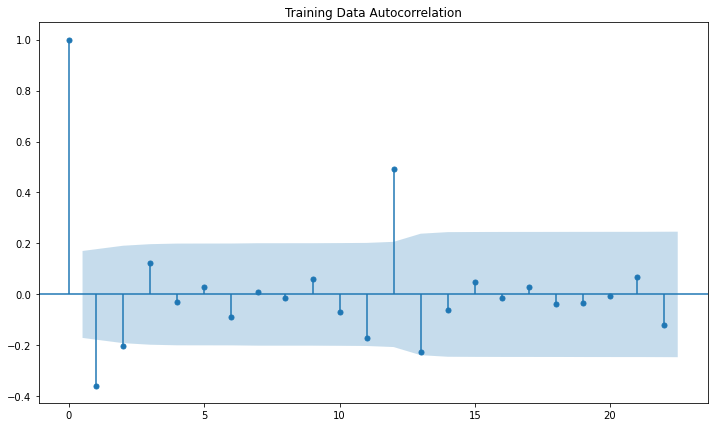

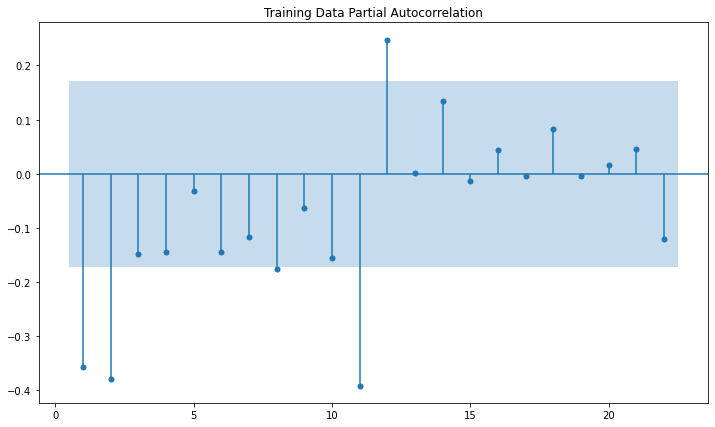

In [290]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

<font color='red'>Manual ARIMA</font>

p=q=2

In [291]:
rmanual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

rresults_manual_ARIMA = rmanual_ARIMA.fit()

print(rresults_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 13 Feb 2022   AIC                           1281.871
Time:                        09:36:17   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

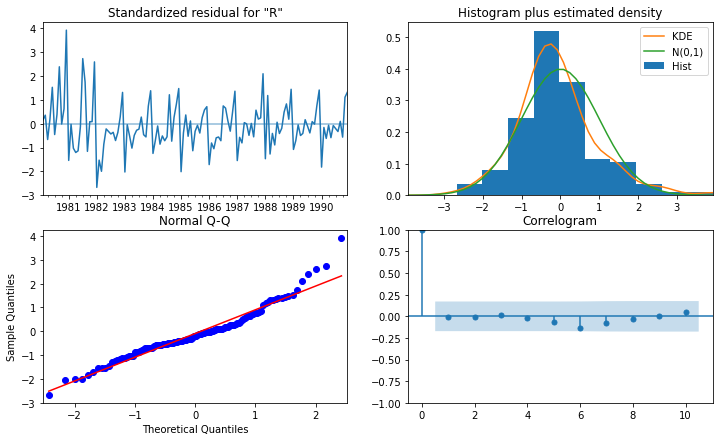

In [292]:
rresults_manual_ARIMA.plot_diagnostics();

In [293]:
rpredicted_manual_ARIMA = rresults_manual_ARIMA.forecast(steps=len(rtest['Rose']))

In [294]:
rrmse_model_9_3 = mean_squared_error(rtest['Rose'],rpredicted_manual_ARIMA,squared=False)
rmape_model_9_3 = mean_absolute_percentage_error(rtest['Rose'],rpredicted_manual_ARIMA)
print('RMSE:',rrmse_model_9_3,'\nMAPE:',rmape_model_9_3)

RMSE: 36.82342004907023 
MAPE: 75.88057964928133


In [295]:
rresultsDf_9_3 = pd.DataFrame({'Test RMSE': rrmse_model_9_3}
                           ,index=['Manual ARIMA(2,1,2)'])
rresultsDf_9_3

Test RMSE
Manual ARIMA(2,1,2)   36.82342

In [296]:
rresultsDf = pd.concat([rresultsDf, rresultsDf_9_3])
rresultsDf

Test RMSE
RegressionOnTime                                    15.255492
NaiveModel                                          79.672475
SimpleAverageModel                                  53.413298
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012
AUTO ARIMA(2,1,3)                                   36.768358
AUTO SARIMA(3,1,1)(3,0,2,12)                        57.956065
Manual ARIMA(2,1,2)                                 36.823420

<font color='red'>Manual SARIMA</font>

In [297]:
import statsmodels.api as sm

rmanual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
rresults_manual_SARIMA = rmanual_SARIMA.fit(maxiter=1000)
print(rresults_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -515.095
Date:                              Sun, 13 Feb 2022   AIC                           1044.191
Time:                                      09:36:19   BIC                           1063.466
Sample:                                  01-01-1980   HQIC                          1052.016
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5632      0.165     -3.407      0.001      -0.887      -0.239
ar.L2         -0.07

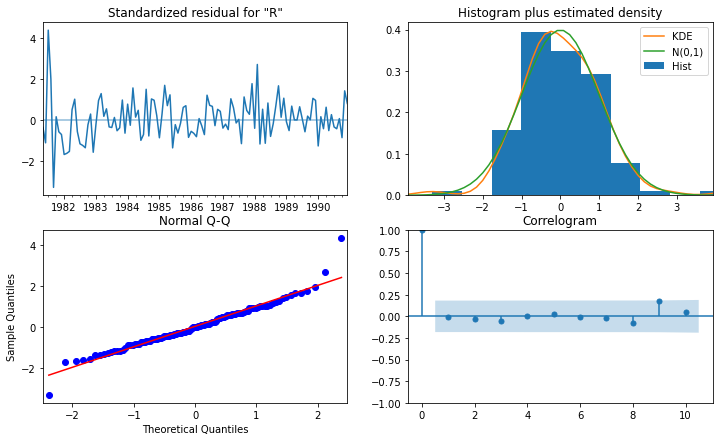

In [298]:
rresults_manual_SARIMA.plot_diagnostics()
plt.show()

In [299]:
rpredicted_manual_SARIMA = rresults_manual_SARIMA.get_forecast(steps=len(rtest['Rose']))

In [300]:
rrmse_model_9_4 = mean_squared_error(rtest['Rose'],rpredicted_manual_SARIMA.predicted_mean,squared=False)
rmape_model_9_4 = mean_absolute_percentage_error(rtest['Rose'],rpredicted_manual_SARIMA.predicted_mean)
print('RMSE:',rrmse_model_9_4,'\nMAPE:',rmape_model_9_4)

RMSE: 21.49268820552561 
MAPE: 43.553197445787454


In [301]:
rresultsDf_9_4 = pd.DataFrame({'Test RMSE': rrmse_model_9_4}
                           ,index=['Manual SARIMA(2,1,2)(1, 0, 1, 12)'])
rresultsDf_9_4

Test RMSE
Manual SARIMA(2,1,2)(1, 0, 1, 12)  21.492688

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [302]:
rresultsDf = pd.concat([rresultsDf, rresultsDf_9_4])
rresultsDf

Test RMSE
RegressionOnTime                                    15.255492
NaiveModel                                          79.672475
SimpleAverageModel                                  53.413298
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012
AUTO ARIMA(2,1,3)                                   36.768358
AUTO SARIMA(3,1,1)(3,0,2,12)                        57.956065
Manual ARIMA(2,1,2)                                 36.823420
Manual SARIMA(2,1,2)(1, 0, 1, 12)                   21.492688

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [303]:
print('Sorted by RMSE values on the Test Data:','\n',)
rresultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012
2pointTrailingMovingAverage                         11.529985
4pointTrailingMovingAverage                         14.444375
RegressionOnTime                                    15.255492
Alpha=0.0651,Beta=0.0526,Gamma=4.3e-06,TripleEx...  21.037637
Manual SARIMA(2,1,2)(1, 0, 1, 12)                   21.492688
Alpha=0.0987,SimpleExponentialSmoothing             36.748401
AUTO ARIMA(2,1,3)                                   36.768358
Alpha=0.1,SimpleExponentialSmoothing                36.780184
Manual ARIMA(2,1,2)                                 36.823420
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.874004
SimpleAverageModel                                  53.413298
AUTO SARIMA(3,1,1)(3,0,2,12)                        57.956065
NaiveModel                                          79.672475

In [304]:
rfullmodel1 = ExponentialSmoothing(rdf,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.2)

In [305]:
rRMSE_fullmodel1 = metrics.mean_squared_error(rdf['Rose'],rfullmodel1.fittedvalues,squared=False)

print('RMSE:',rRMSE_fullmodel1)

RMSE: 17.401030688080066


In [306]:
# len(rtest['Rose'])

In [307]:
rprediction_a = rfullmodel1.forecast(steps=len(rtest['Rose']))
# rprediction_a = rfullmodel1.forecast(steps=12)

<AxesSubplot:xlabel='YearMonth'>

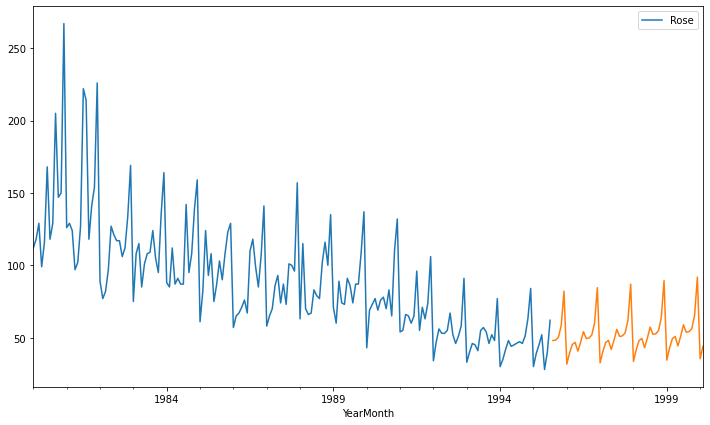

In [308]:
rdf.plot()
rprediction_a.plot()

In [309]:
# Getting the predictions for the same number of times stamps that are present in the test data
rprediction_1 = rfullmodel1.forecast(steps=12)

In [310]:
rprediction_1

1995-08-01    48.027146
1995-09-01    48.319651
1995-10-01    50.294057
1995-11-01    58.455624
1995-12-01    82.095526
1996-01-01    31.683779
1996-02-01    39.404477
1996-03-01    45.318818
1996-04-01    46.745747
1996-05-01    40.681298
1996-06-01    46.928740
1996-07-01    54.163611
Freq: MS, dtype: float64

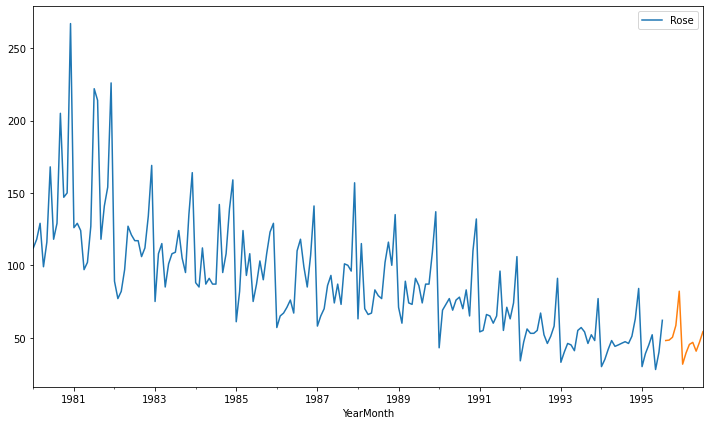

In [311]:
rdf.plot()
rprediction_1.plot();

In [312]:
# fullmodel1.summary()
# 1.96*np.std(fullmodel1.resid,ddof=1)
# fullmodel1.resid
# pred_1_df.index

In [313]:
rpred_1_df = pd.DataFrame({'lower_CI':rprediction_1 - 1.96*np.std(rfullmodel1.resid,ddof=1),
                          'prediction':rprediction_1,
                          'upper_ci': rprediction_1 + 1.96*np.std(rfullmodel1.resid,ddof=1)})
rpred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  13.848303   48.027146   82.205988
1995-09-01  14.140808   48.319651   82.498493
1995-10-01  16.115215   50.294057   84.472900
1995-11-01  24.276782   58.455624   92.634467
1995-12-01  47.916684   82.095526  116.274369

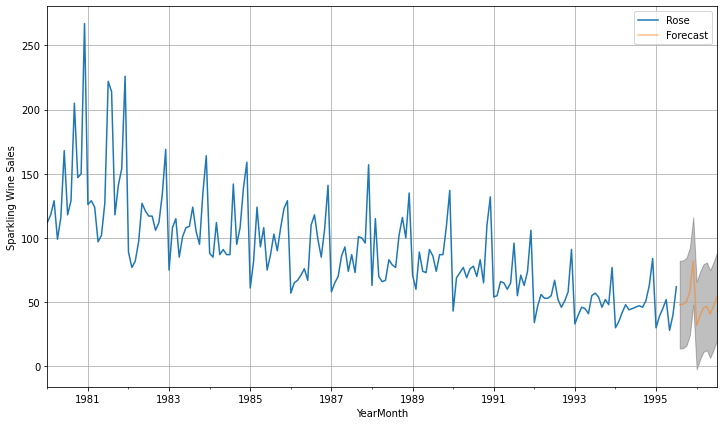

In [314]:
# plot the forecast along with the confidence band

axis = rdf.plot(label='Actual', figsize=(12,7))
rpred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(rpred_1_df.index, rpred_1_df['lower_CI'], rpred_1_df['upper_ci'], color='k', alpha=.25)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [315]:
# 